In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from scipy import stats



In [2]:
df = pd.read_csv('/content/ntrarogyaseva.csv')

In [3]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

,0
,int64
AGE,int64
SEX,object
CASTE_NAME,object
CATEGORY_CODE,object
CATEGORY_NAME,object
SURGERY_CODE,object
SURGERY,object
VILLAGE,object
MANDAL_NAME,object


In [4]:
df.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


In [5]:
df.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [6]:
print(df.isnull().sum())


                         0
AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_LOCATION            0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
dtype: int64


In [7]:
df = df.drop(['MORTALITY_DATE','DISCHARGE_DATE','   '], axis=1)
df


,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,Mortality Y / N,SRC_REGISTRATION
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,NO,D
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,NO,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,12500,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,NO,D
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,NO,D
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,NO,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,Nellore,...,24910,30/12/2017 21:34:34,24910,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,15/11/2017 00:00:00,NO,D
479684,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,Prakasam,...,45910,30/12/2017 21:37:20,45910,Manipal Health Enterprises PVT LTD,C,GUNTUR,Guntur,17/11/2017 00:00:00,NO,D
479685,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,Nellore,...,30000,30/12/2017 21:37:19,30000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,16/11/2017 00:00:00,NO,D
479686,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,West Godavari,...,23020,30/12/2017 21:37:23,23020,Sankar Eye Hospital,C,GUNTUR,Guntur,16/11/2017 00:00:00,NO,D


In [8]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [9]:
df.describe(include='all')

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,Mortality Y / N,SRC_REGISTRATION
count,479688.000000,479688,479688,479688,479688,479688,479688,479688,479688,479688,...,479688.000000,479688,479688.000000,479688,479688,479688,479688,479688,479688,479688
unique,NaN,6,6,29,29,925,923,11801,711,13,...,NaN,111513,NaN,467,2,61,20,937,2,4
top,NaN,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-1,Visakhapatnam,East Godavari,...,NaN,01/03/2017 21:18:50,NaN,Sri Venkateswara Institute Of Medical Sciences,C,VISAKHAPATNAM,Guntur,13/02/2017 00:00:00,NO,D
freq,NaN,260718,246164,74947,74947,65378,65378,3277,9264,55398,...,NaN,27,NaN,21854,369346,50715,60988,1602,469566,437948
mean,44.912264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30428.941698,NaN,27652.205861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,18.961084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.592281,NaN,25951.706037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12500.000000,NaN,12500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25000.000000,NaN,23200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35000.000000,NaN,30600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['SEX'] = df['SEX'].str.upper()
df['SEX'].value_counts()

,count
SEX,
MALE,260727
FEMALE,178968
MALE(CHILD),25068
FEMALE(CHILD),14925


<Axes: xlabel='SEX'>

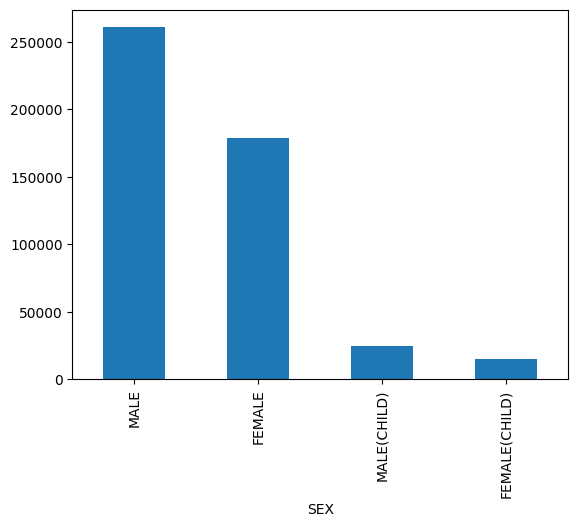

In [11]:
df['SEX'] = df['SEX'].replace({'BOY': 'MALE(CHILD)', 'GIRL': 'FEMALE(CHILD)'})
df['SEX'].value_counts().plot.bar()

In [12]:
df['CASTE_NAME'].value_counts()

,count
CASTE_NAME,
BC,246164
OC,114123
SC,76742
Minorities,29150
ST,13138
Others,371


<Axes: xlabel='Mortality Y / N'>

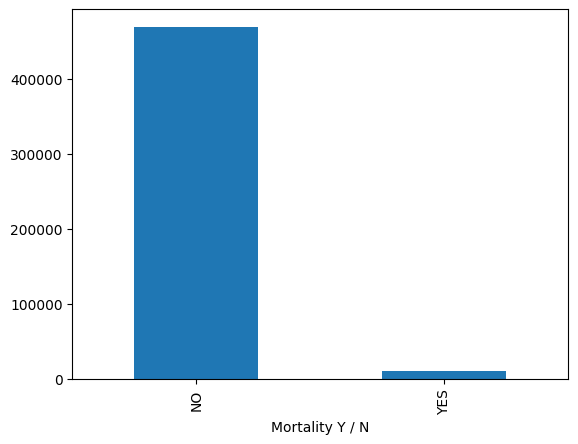

In [13]:

df['Mortality Y / N'].value_counts().plot.bar()

Mortality is highly NO. This imbalance in the dataset must be addressed


In [14]:
df['Mortality'] = df['Mortality Y / N'].map({'YES': 1, 'NO': 0})


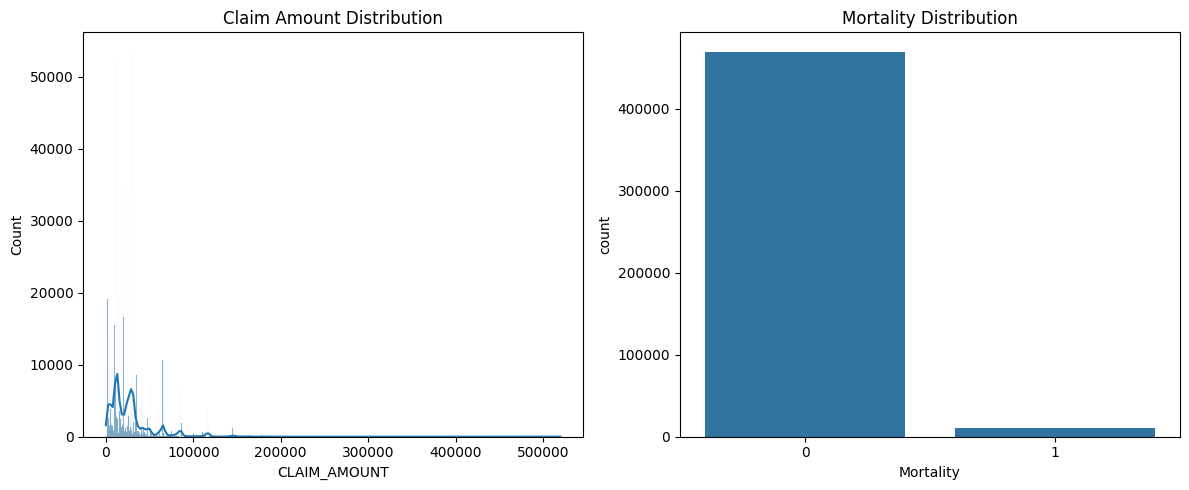

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['CLAIM_AMOUNT'], kde=True, ax=ax[0])
ax[0].set_title('Claim Amount Distribution')
sns.countplot(x='Mortality', data=df, ax=ax[1])
ax[1].set_title('Mortality Distribution')
plt.tight_layout()
plt.show()


Distribution of SEX:
SEX
MALE             0.543535
FEMALE           0.373093
MALE(CHILD)      0.052259
FEMALE(CHILD)    0.031114
Name: proportion, dtype: float64


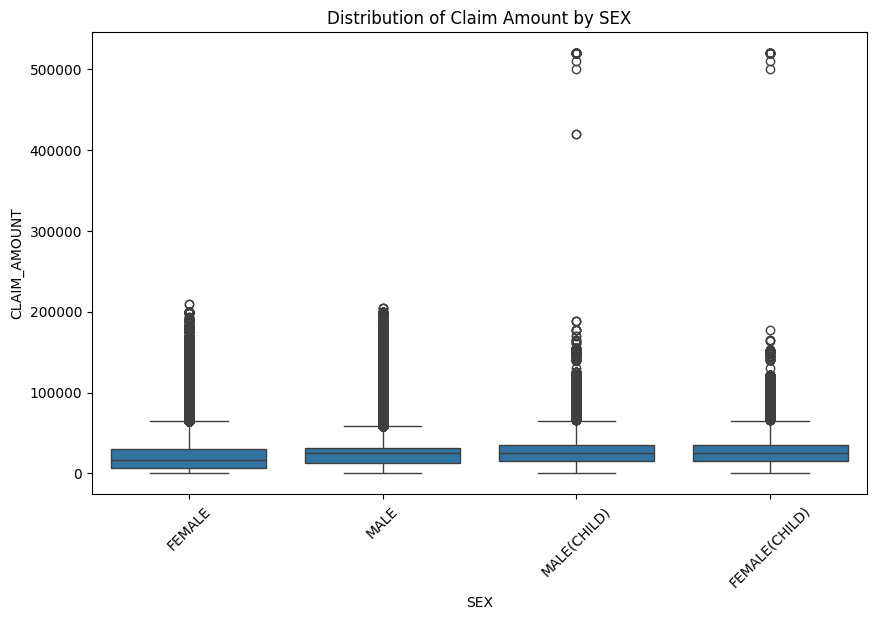

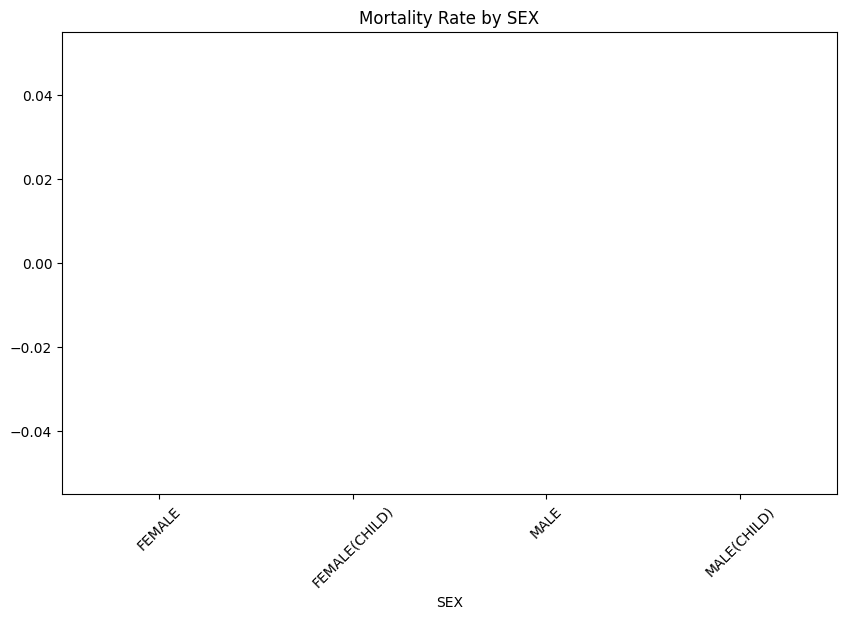


Distribution of CASTE_NAME:
CASTE_NAME
BC            0.513175
OC            0.237911
SC            0.159983
Minorities    0.060769
ST            0.027389
Others        0.000773
Name: proportion, dtype: float64


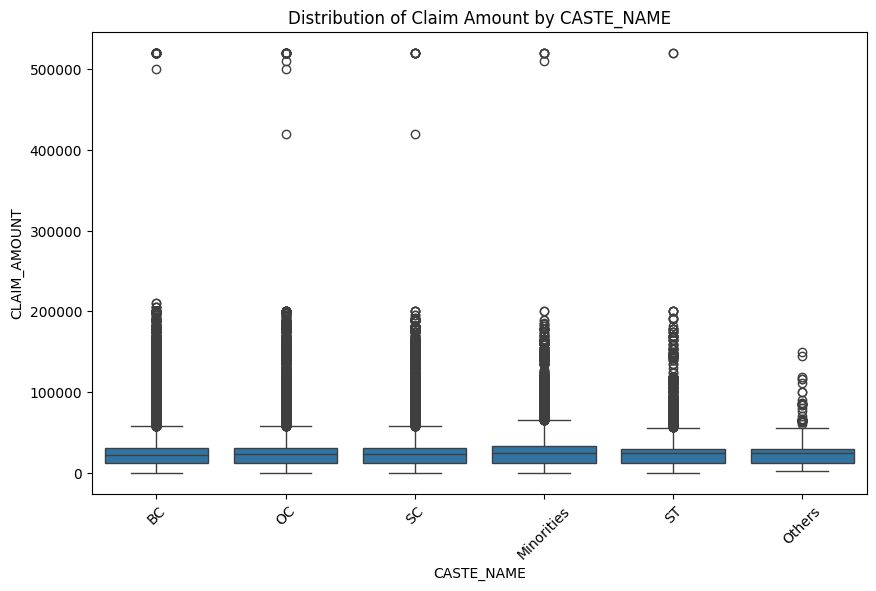

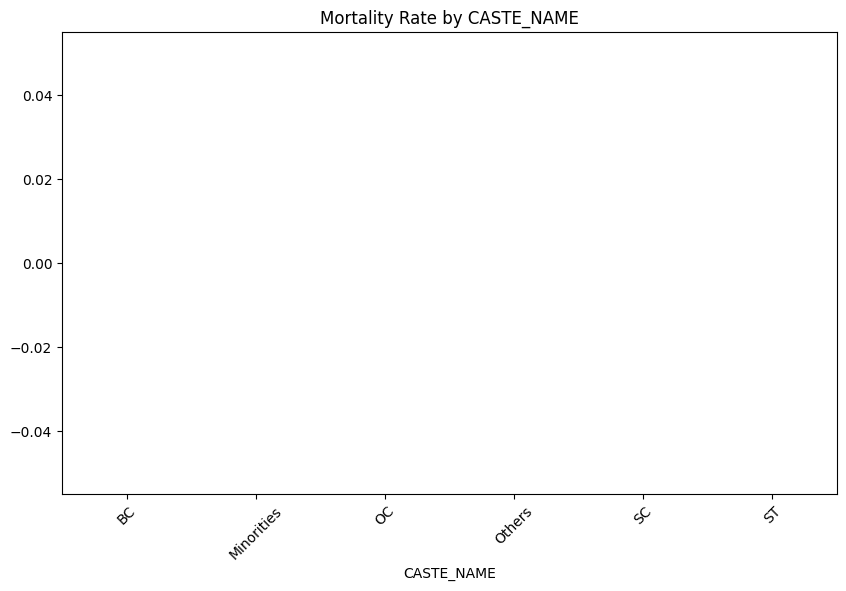


Distribution of CATEGORY_CODE:
CATEGORY_CODE
M6     0.156241
S12    0.146258
S15    0.135165
S7     0.092145
S9     0.084459
S1     0.050677
M4     0.044975
S13    0.039688
M5     0.038836
S5     0.032896
S3     0.030833
M7     0.027854
S2     0.025227
S10    0.022759
S11    0.022371
M8     0.009652
S8     0.008614
M12    0.008274
S4     0.007753
M1     0.004839
S14    0.003506
M2     0.002848
S6     0.002320
M11    0.001063
M10    0.000409
M9     0.000171
S16    0.000154
M3     0.000010
S17    0.000004
Name: proportion, dtype: float64


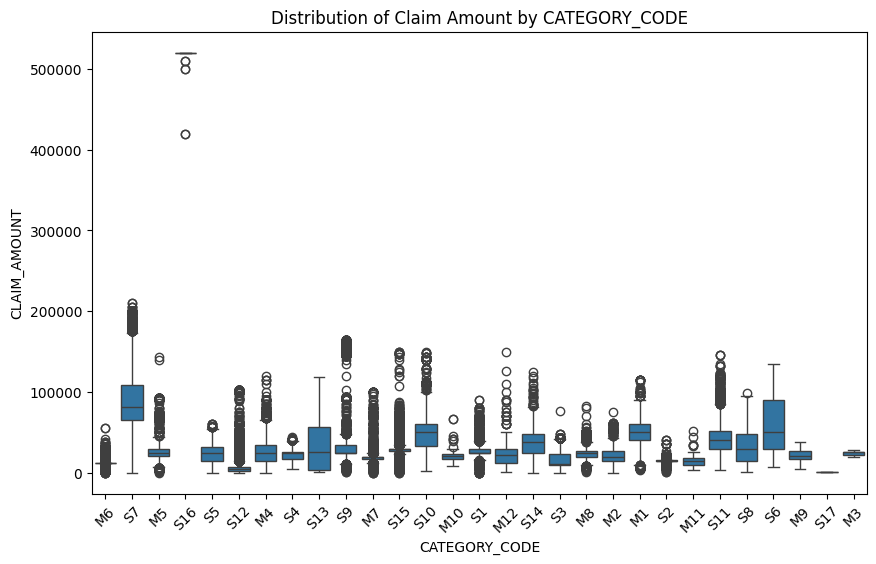

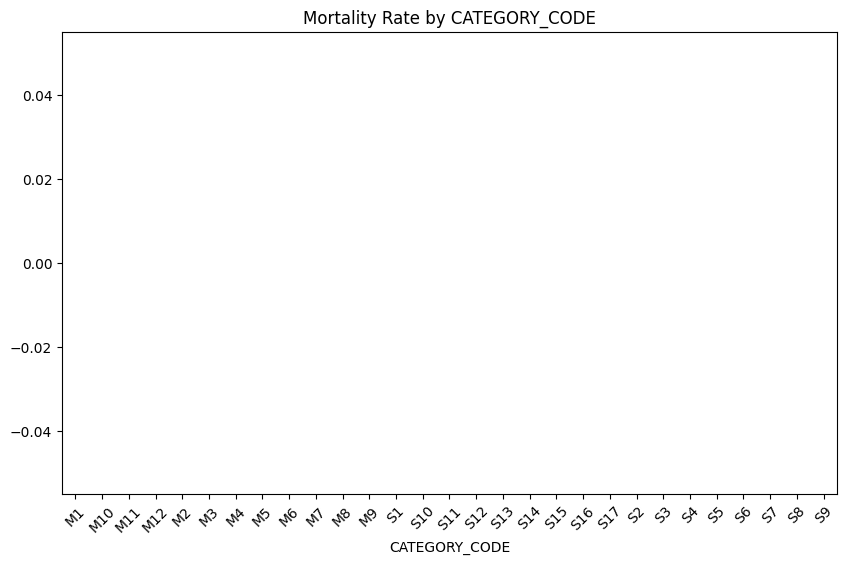


Distribution of SURGERY_CODE:
SURGERY_CODE
M6.5         0.136293
S15.1.1      0.116226
S7.1.1.3     0.035805
S12.2.1      0.035696
S9.3.4       0.032311
               ...   
S7.11.8      0.000002
S7.2.14.1    0.000002
S7.2.13.2    0.000002
S11.24.2     0.000002
S12.14.3     0.000002
Name: proportion, Length: 925, dtype: float64


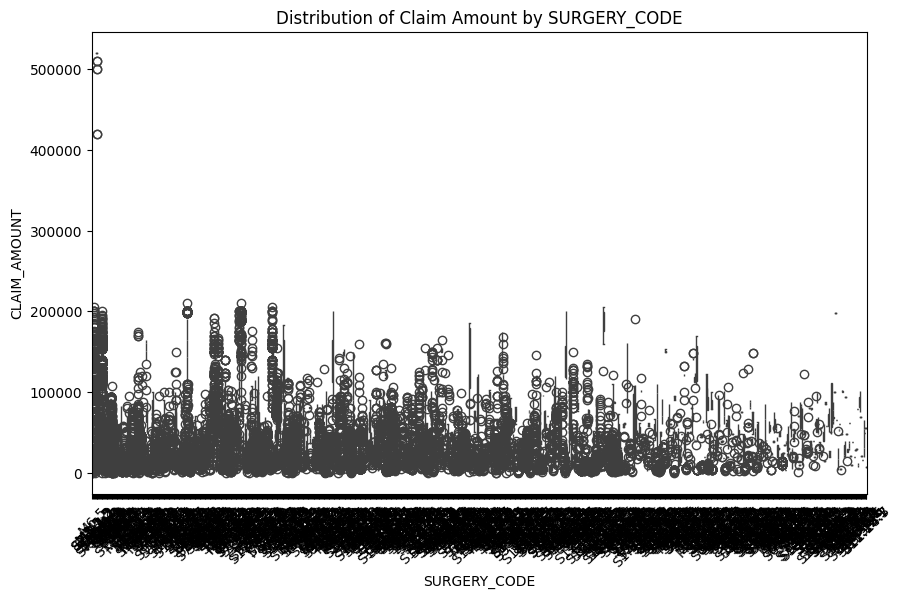

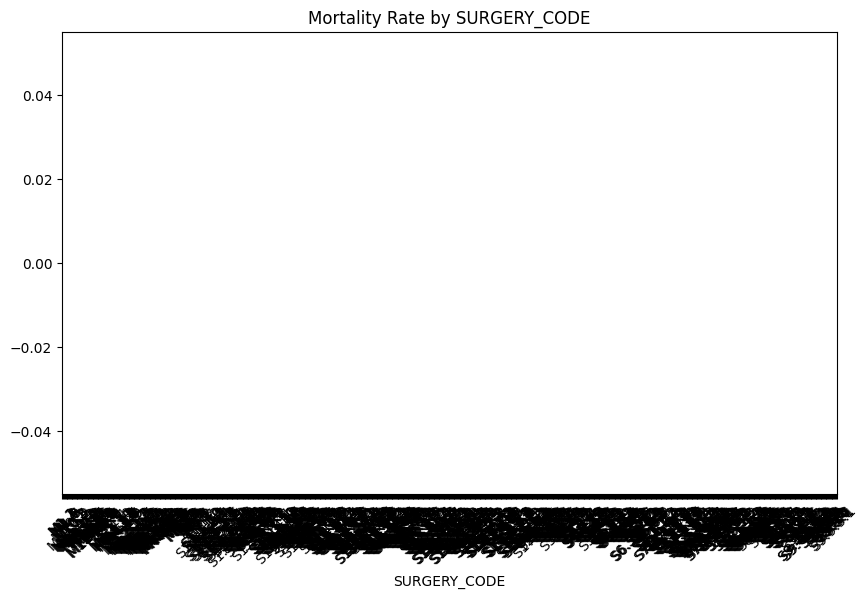


Distribution of HOSP_TYPE:
HOSP_TYPE
C    0.769971
G    0.230029
Name: proportion, dtype: float64


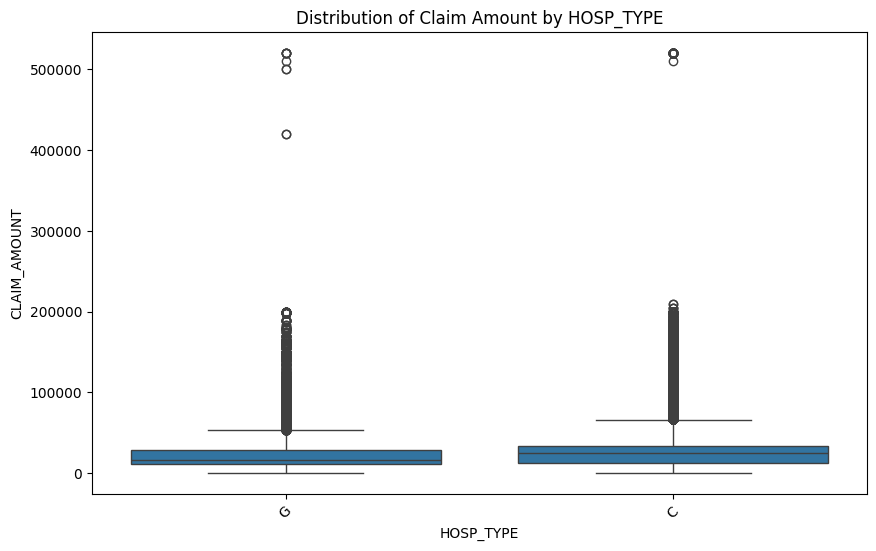

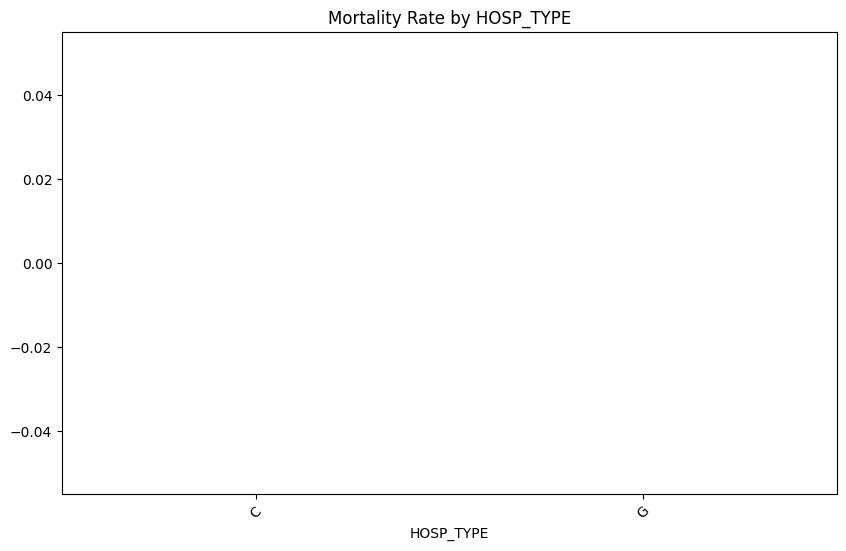


Distribution of HOSP_LOCATION:
HOSP_LOCATION
VISAKHAPATNAM    0.105725
GUNTUR           0.104999
VIJAYAWADA       0.090175
NELLORE          0.088401
TIRUPATHI        0.087651
                   ...   
KARIMNAGAR       0.000023
MAHBUBNAGAR      0.000013
WARANGAL         0.000006
NIZAMABAD        0.000004
KAMAREDDY        0.000002
Name: proportion, Length: 61, dtype: float64


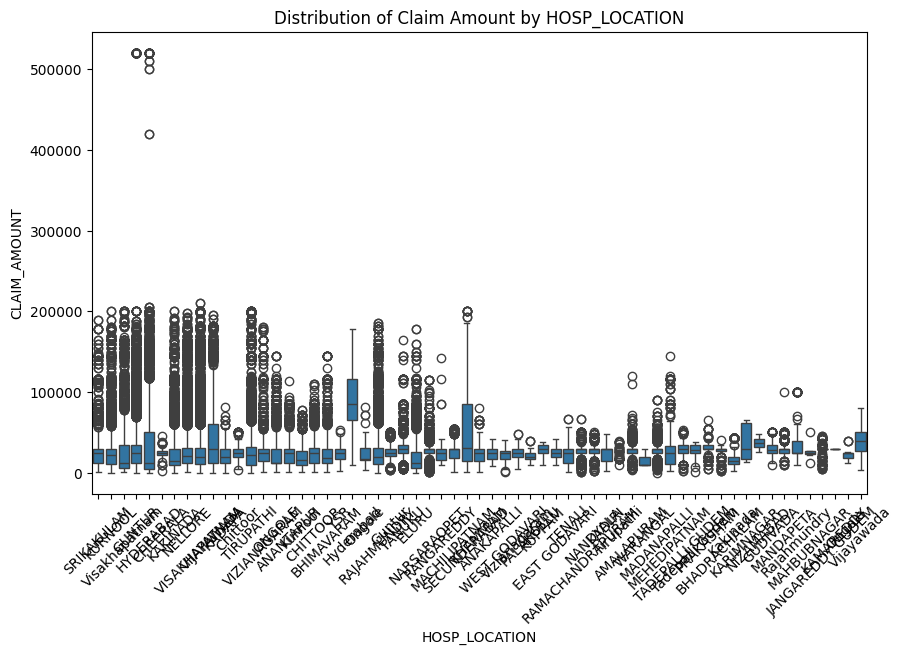

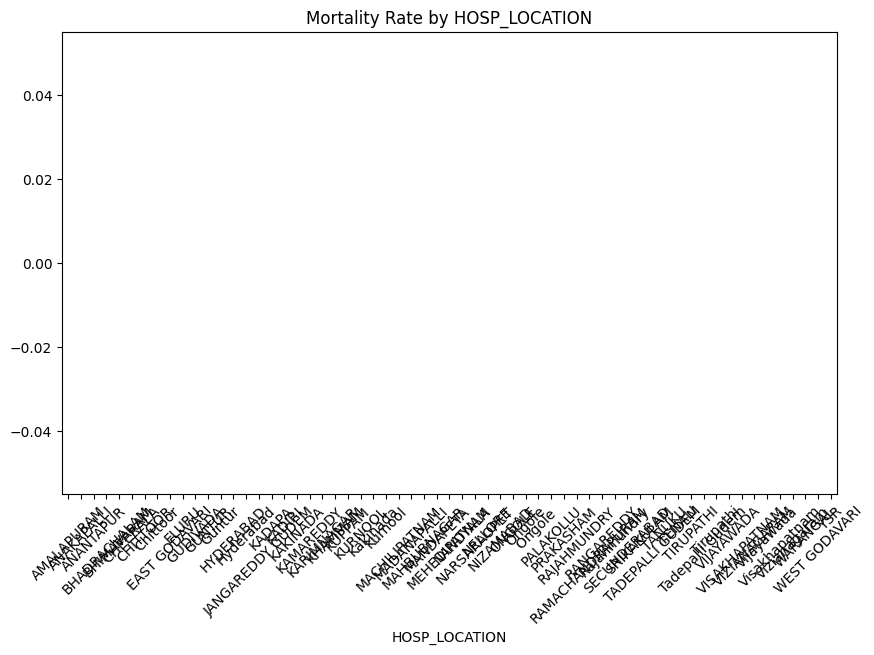


Distribution of HOSP_DISTRICT:
HOSP_DISTRICT
Guntur            0.127141
Vishakhapatnam    0.123693
East Godavari     0.121047
Chittoor          0.102508
Krishna           0.094174
Nellore           0.088401
Kurnool           0.068845
Hyderabad         0.058194
West Godavari     0.049551
Anantapur         0.038450
Prakasam          0.034931
Srikakulam        0.033641
Vizianagaram      0.028275
YSR Kadapa        0.027787
Ranga Reddy       0.002593
Khammam           0.000721
Karimnagar        0.000023
Mahabubnagar      0.000013
Warangal          0.000006
Nizamabad         0.000006
Name: proportion, dtype: float64


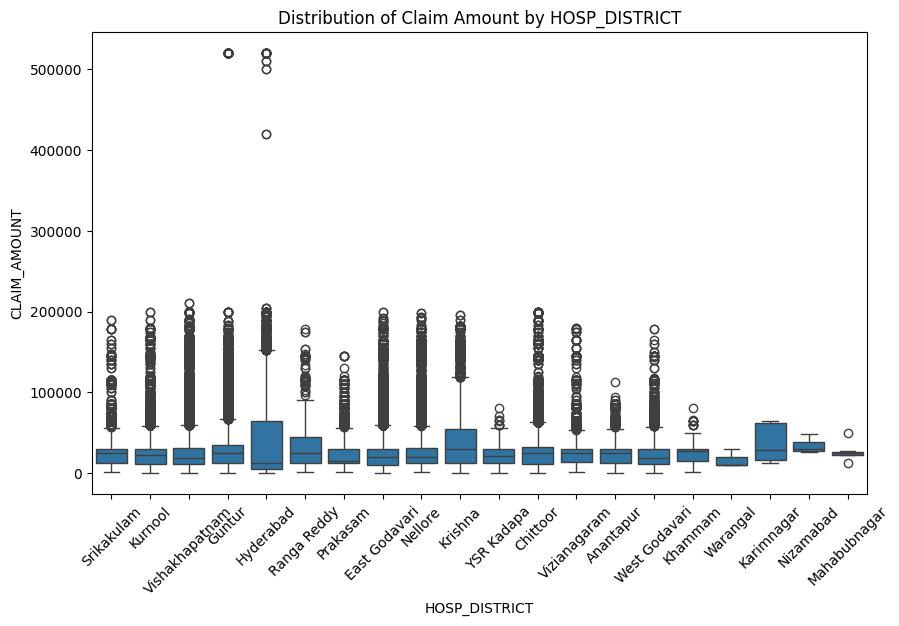

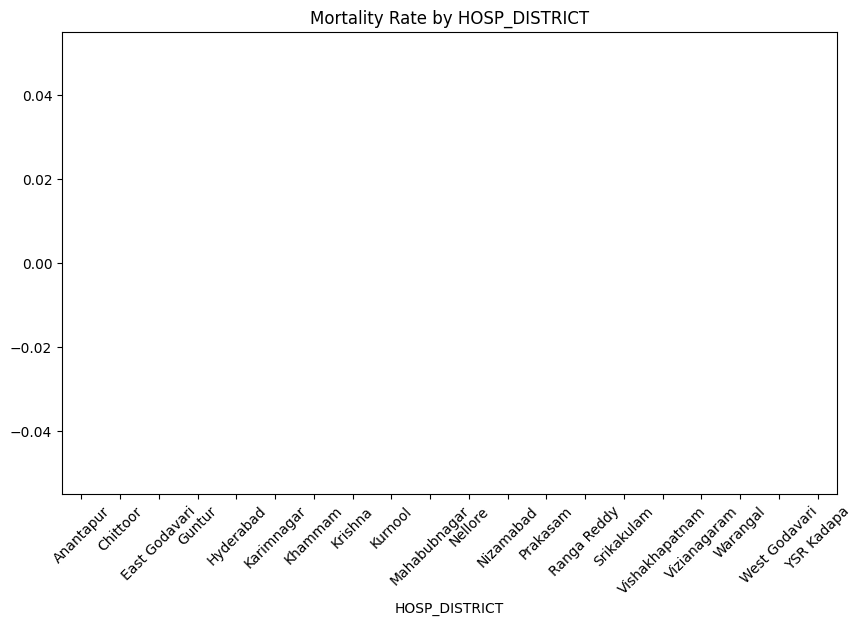

In [16]:
categorical_cols = ['SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'SURGERY_CODE','HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT']
for col in categorical_cols:
  print(f"\nDistribution of {col}:")
  print(df[col].value_counts(normalize=True))
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=col, y='CLAIM_AMOUNT', data=df)
  plt.xticks(rotation=45)
  plt.title(f'Distribution of Claim Amount by {col}')
  plt.show()

  plt.figure(figsize=(10, 6))
  mortality_rates = df.groupby(col)['Mortality'].apply(lambda x: (x == '1').mean())
  mortality_rates.plot(kind='bar')
  plt.title(f'Mortality Rate by {col}')
  plt.xticks(rotation=45)
  plt.show()

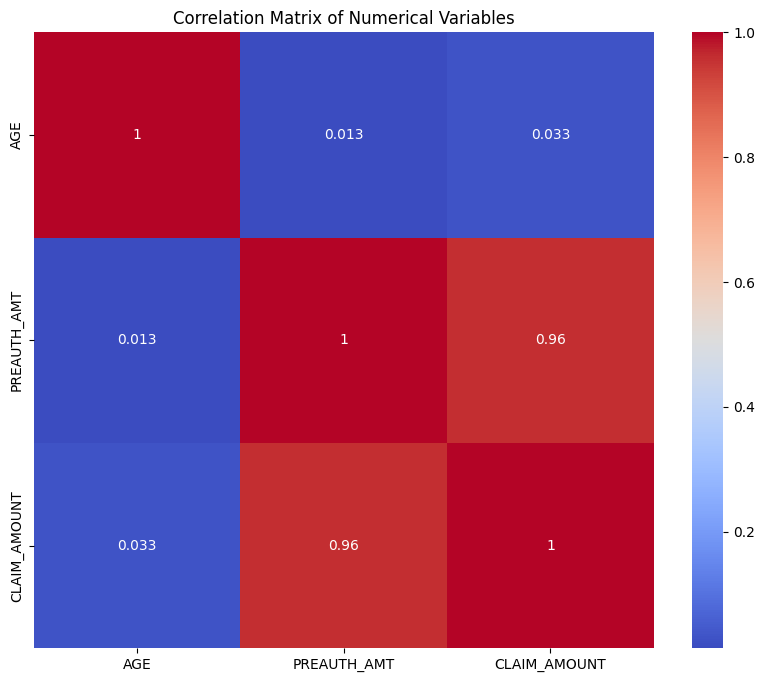

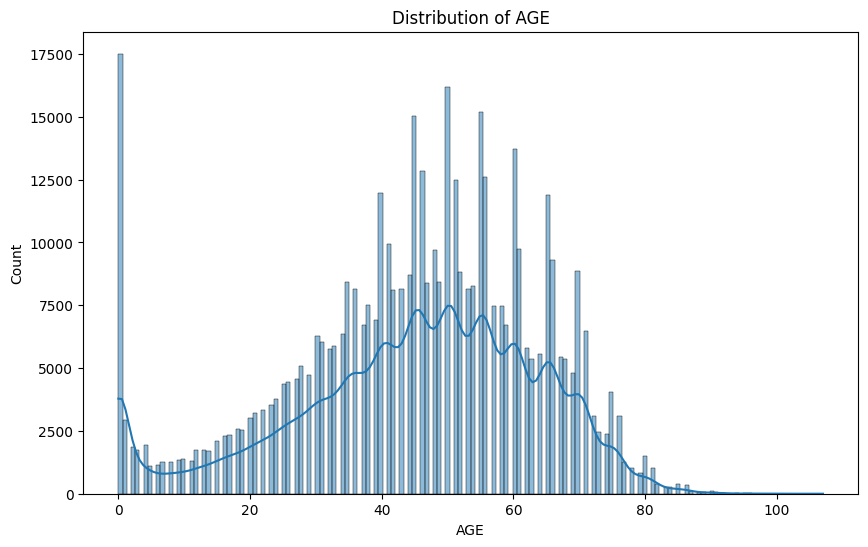

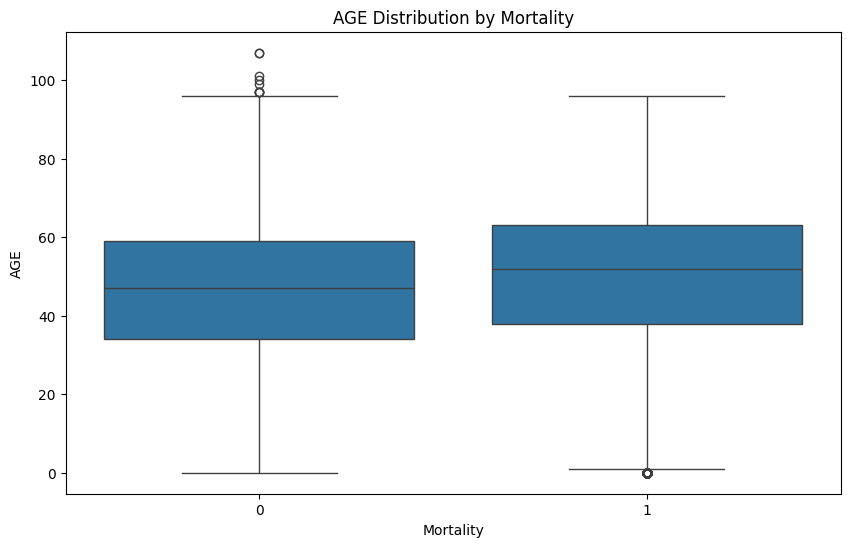

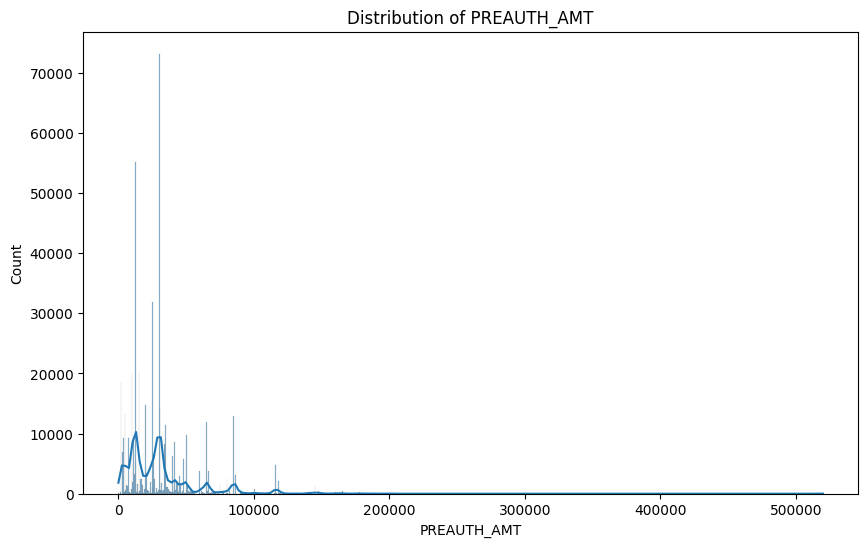

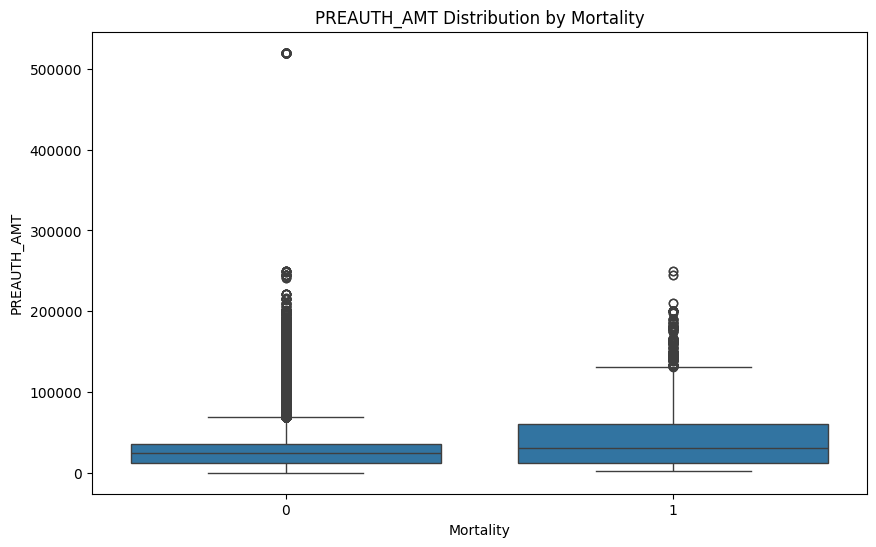

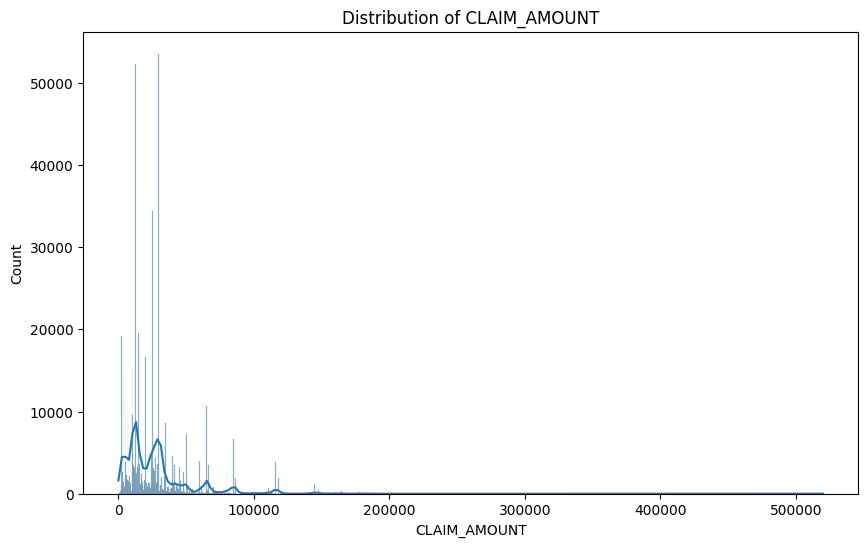

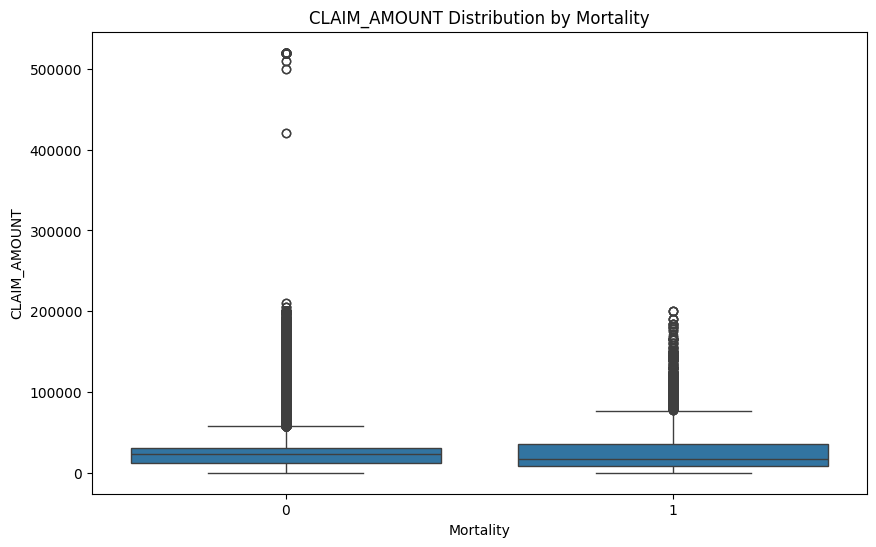

In [17]:
numerical_cols = ['AGE', 'PREAUTH_AMT', 'CLAIM_AMOUNT']

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Distribution plots
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

  # Relationship with Mortality
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Mortality', y=col, data=df)
  plt.title(f'{col} Distribution by Mortality')
  plt.show()

In [18]:
hosp_analysis = df.groupby('HOSP_NAME').agg({
    'CLAIM_AMOUNT': ['mean', 'median', 'count'],
    'Mortality': 'mean'
})
print("\nHospital-wise analysis:")
print(hosp_analysis)


Hospital-wise analysis:
                                                    CLAIM_AMOUNT           \
                                                            mean   median   
HOSP_NAME                                                                   
7 STAR SUPER SPECIALITY HOSPITAL                    28045.749354  30000.0   
AASHA HOSPITAL                                      27062.820513  25000.0   
AASHRITHA HOSPITAL                                  25090.000000  29550.0   
AAYUSH NRI LEPL HEALTHCARE PVT LTD                  54534.125222  56310.0   
ABC HOSPITALS                                       16188.071713  12500.0   
...                                                          ...      ...   
sri sai seven hills hospitals a division of edu...  18001.714286  15000.0   
ss medicare multispeciality hospital                28888.888889  30000.0   
surya hospital                                      18824.081955  12500.0   
swarup eye hospital and laser center               

Geospatial Analysis


In [19]:
district_analysis = df.groupby('DISTRICT_NAME').agg({
    'CLAIM_AMOUNT': 'mean',
    'Mortality': 'mean',
    'AGE': 'median'
})
print("\nDistrict-wise analysis:")
print(district_analysis)


District-wise analysis:
                CLAIM_AMOUNT  Mortality   AGE
DISTRICT_NAME                                
Anantapur       27664.166979   0.017467  48.0
Chittoor        25708.102691   0.023430  46.0
East Godavari   26166.136720   0.014459  47.0
Guntur          31048.739507   0.018129  48.0
Krishna         31015.383233   0.020017  48.0
Kurnool         28598.918533   0.027864  46.0
Nellore         26105.122377   0.031504  50.0
Prakasam        28655.810362   0.021052  49.0
Srikakulam      25593.712619   0.018354  45.0
Vishakhapatnam  25977.946383   0.021765  45.0
Vizianagaram    25097.780069   0.019381  43.0
West Godavari   27936.706086   0.024101  48.0
YSR Kadapa      27945.216899   0.018534  48.0


In [20]:
df['CLAIM_DATE'] = pd.to_datetime(df['CLAIM_DATE'], dayfirst=True)
df['SURGERY_DATE'] = pd.to_datetime(df['SURGERY_DATE'], dayfirst=True)
df['PREAUTH_DATE'] = pd.to_datetime(df['PREAUTH_DATE'], dayfirst=True)

<ipython-input-21-eedb6480f146>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_claims = df.resample('M', on='CLAIM_DATE')['CLAIM_AMOUNT'].mean()
<ipython-input-21-eedb6480f146>:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  age_trend = df.resample('Q', on='SURGERY_DATE')['AGE'].mean()
<ipython-input-21-eedb6480f146>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  preauth_trend = df.resample('M', on='PREAUTH_DATE')['PREAUTH_AMT'].mean()


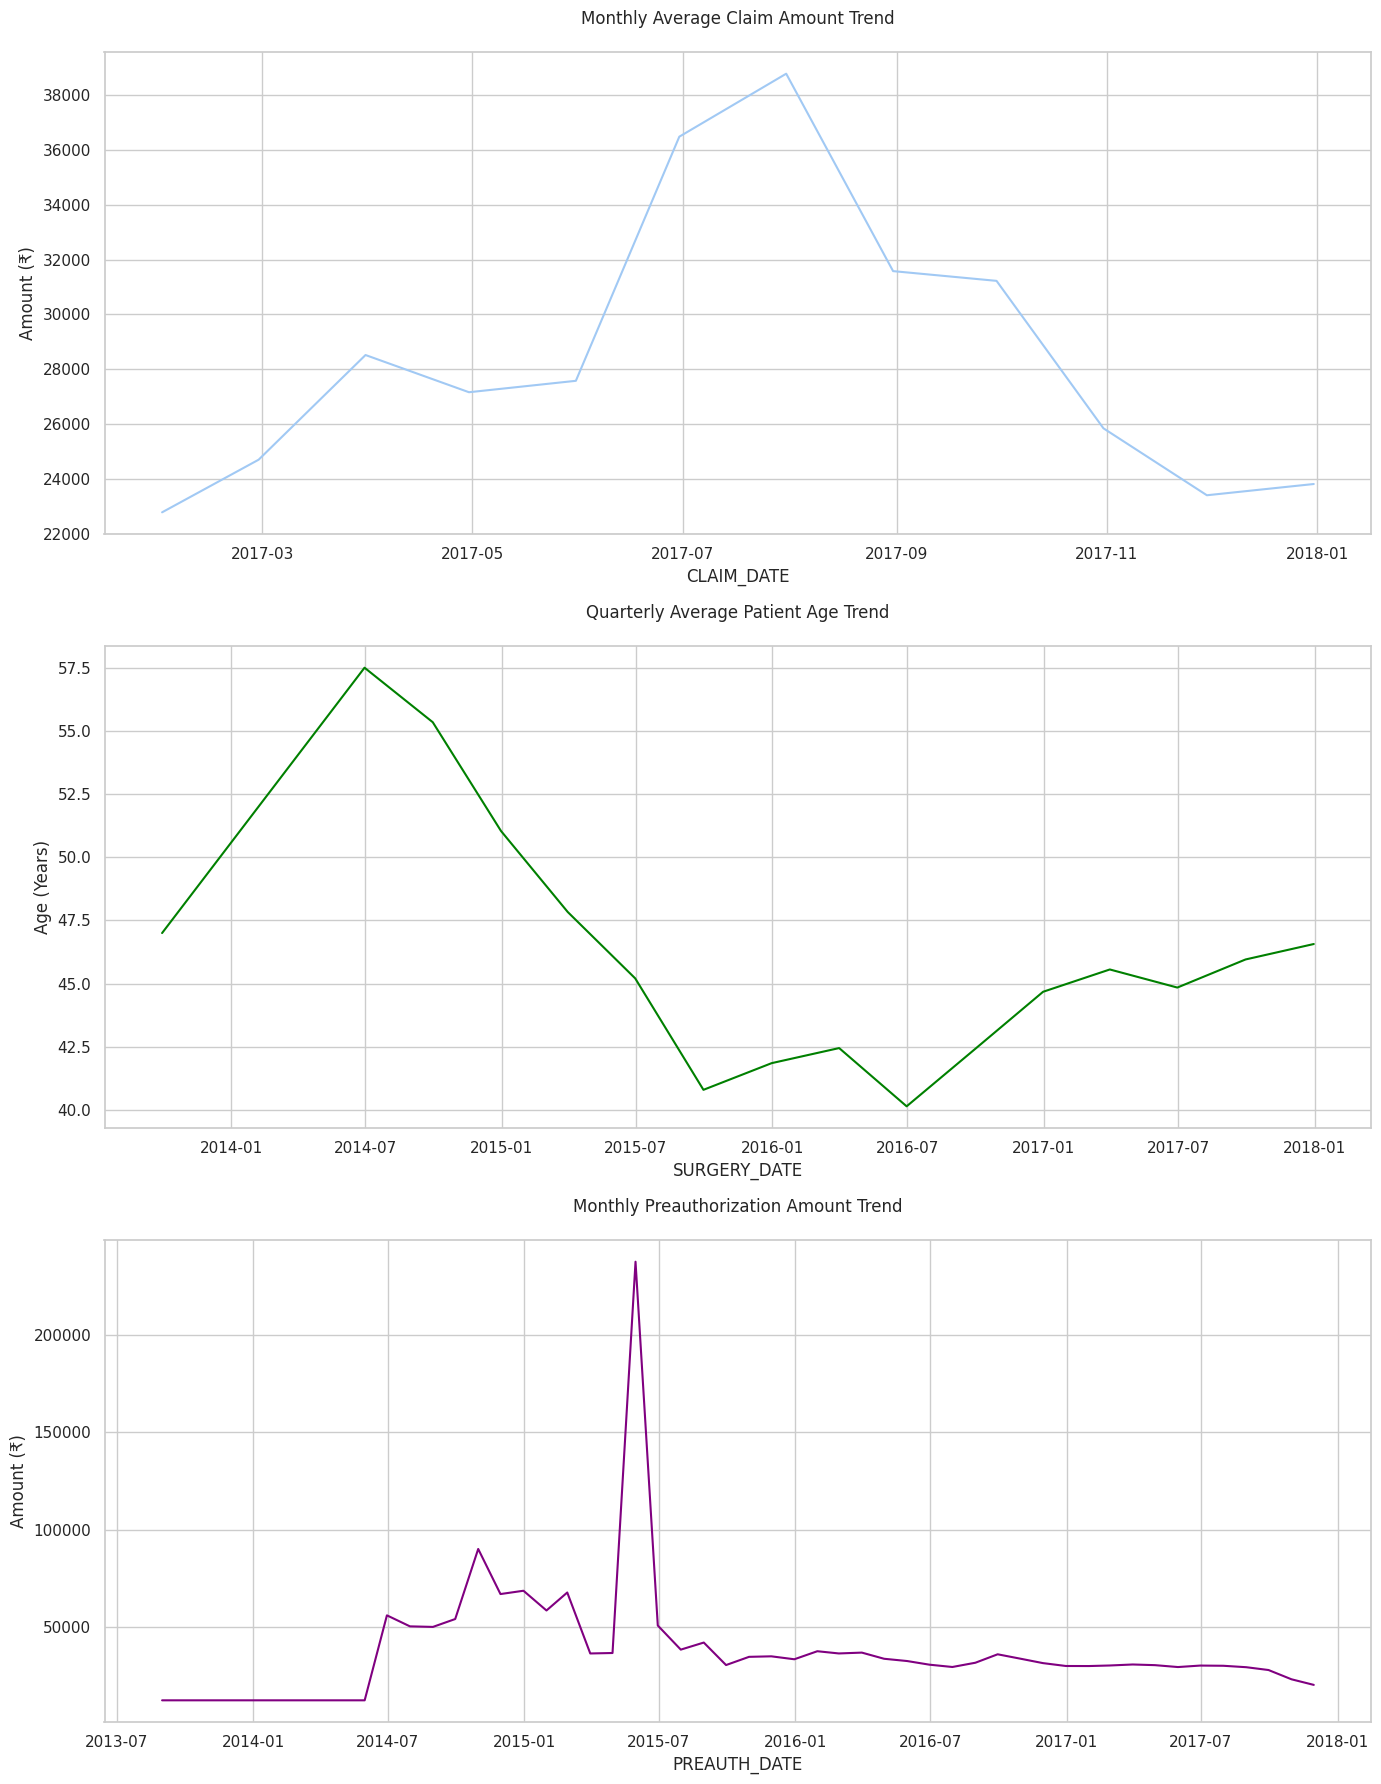

In [21]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
# Claim Amount Trend
monthly_claims = df.resample('M', on='CLAIM_DATE')['CLAIM_AMOUNT'].mean()
sns.lineplot(x=monthly_claims.index, y=monthly_claims.values, ax=axes[0])
axes[0].set_title('Monthly Average Claim Amount Trend', pad=20)
axes[0].set_ylabel('Amount (₹)')

# Age Distribution Trend
age_trend = df.resample('Q', on='SURGERY_DATE')['AGE'].mean()
sns.lineplot(x=age_trend.index, y=age_trend.values, ax=axes[1], color='green')
axes[1].set_title('Quarterly Average Patient Age Trend', pad=20)
axes[1].set_ylabel('Age (Years)')

# Preauth Amount Comparison
preauth_trend = df.resample('M', on='PREAUTH_DATE')['PREAUTH_AMT'].mean()
sns.lineplot(x=preauth_trend.index, y=preauth_trend.values, ax=axes[2], color='purple')
axes[2].set_title('Monthly Preauthorization Amount Trend', pad=20)
axes[2].set_ylabel('Amount (₹)')

plt.tight_layout()
plt.show()

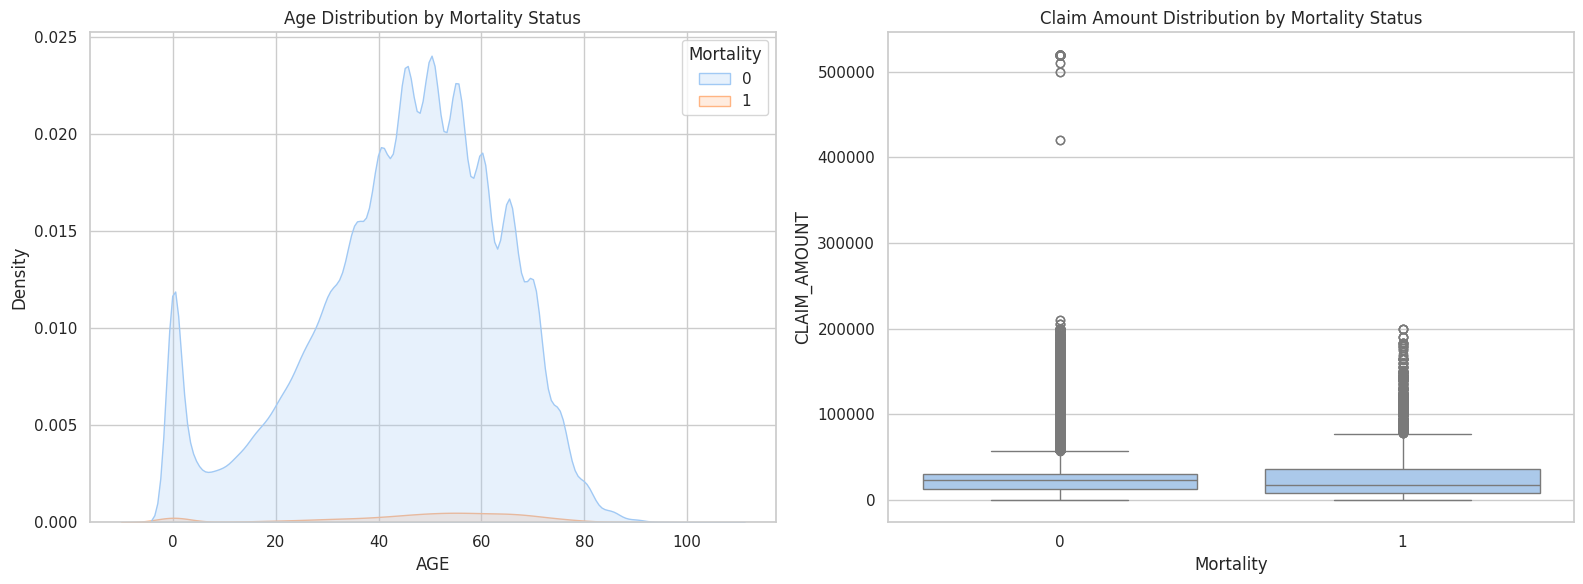

In [22]:
# Mortality Analysis
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='AGE', hue='Mortality', fill=True)
plt.title('Age Distribution by Mortality Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Mortality', y='CLAIM_AMOUNT', data=df)
plt.title('Claim Amount Distribution by Mortality Status')
plt.tight_layout()
plt.show()

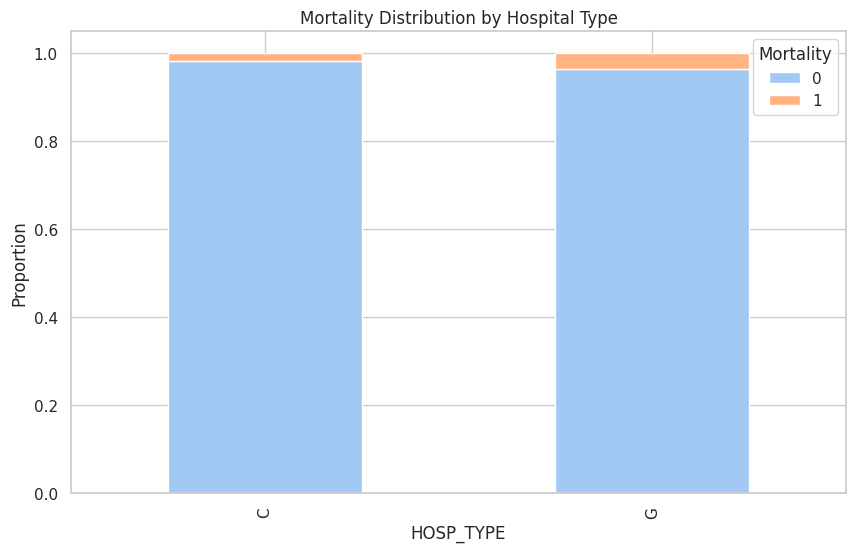

In [23]:
# Hospital Type Analysis
hosp_analysis = df.groupby('HOSP_TYPE')['Mortality'].value_counts(normalize=True).unstack()
hosp_analysis.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Mortality Distribution by Hospital Type')
plt.ylabel('Proportion')
plt.show()


District-wise Statistics:
               CLAIM_AMOUNT        Mortality
                       mean  count  <lambda>
DISTRICT_NAME                               
Anantapur          27664.17  28854      0.02
Chittoor           25708.10  36790      0.02
East Godavari      26166.14  55398      0.01
Guntur             31048.74  50416      0.02
Krishna            31015.38  41964      0.02
Kurnool            28598.92  32013      0.03
Nellore            26105.12  39836      0.03
Prakasam           28655.81  34819      0.02
Srikakulam         25593.71  27079      0.02
Vishakhapatnam     25977.95  36481      0.02
Vizianagaram       25097.78  25799      0.02
West Godavari      27936.71  40995      0.02
YSR Kadapa         27945.22  29244      0.02


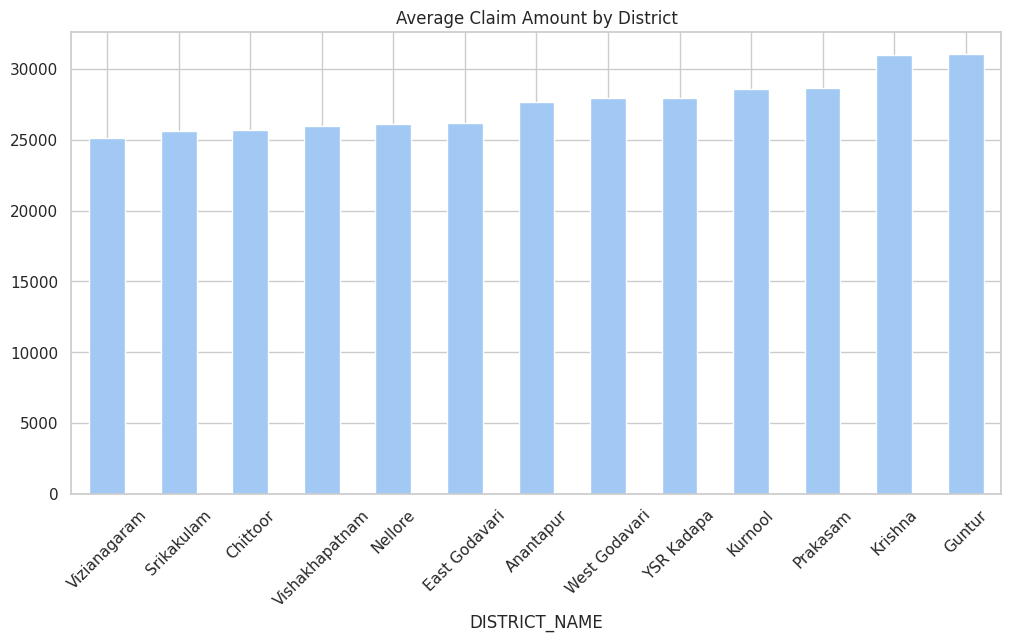

In [24]:
district_stats = df.groupby('DISTRICT_NAME').agg({'CLAIM_AMOUNT': ['mean', 'count'],'Mortality': lambda x: (x == 1).mean()}).round(2)
print("\nDistrict-wise Statistics:")
print(district_stats)

# Visualize district-wise patterns
plt.figure(figsize=(12, 6))
district_stats[('CLAIM_AMOUNT', 'mean')].sort_values().plot(kind='bar')
plt.title('Average Claim Amount by District')
plt.xticks(rotation=45)
plt.show()


Number of outliers in AGE: 2

Number of outliers in PREAUTH_AMT: 12968

Number of outliers in CLAIM_AMOUNT: 12174


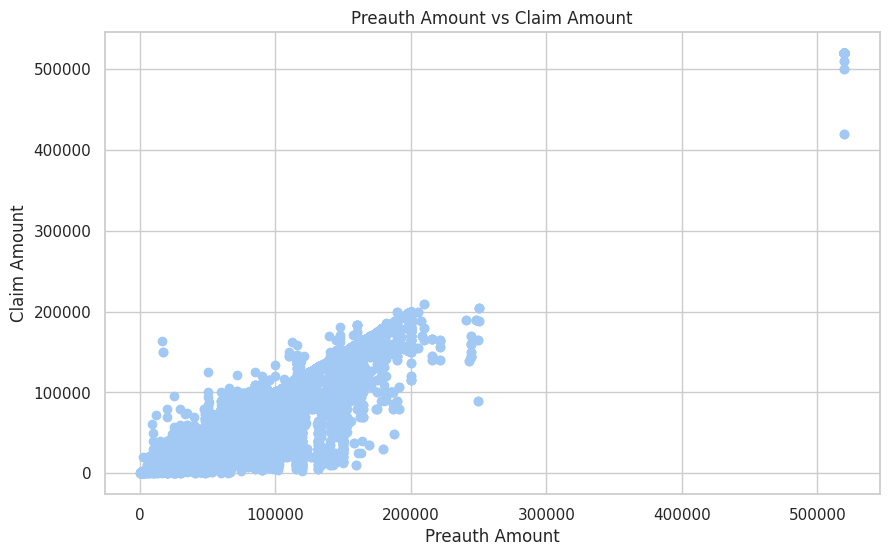

In [25]:
#Outliers and Patterns
for col in numerical_cols:
  z_scores = np.abs(stats.zscore(df[col]))
  outliers = (z_scores > 3).sum()
  print(f"\nNumber of outliers in {col}: {outliers}")

# Analyze claim amount vs preauth amount
plt.figure(figsize=(10, 6))
plt.scatter(df['PREAUTH_AMT'], df['CLAIM_AMOUNT'])
plt.xlabel('Preauth Amount')
plt.ylabel('Claim Amount')
plt.title('Preauth Amount vs Claim Amount')
plt.show()


Top 10 VILLAGE Analysis:
                   Count  Avg_Claim  Mortality_Rate_%
VILLAGE                                              
Ward-1              3277   28659.66               0.0
Visakhapatnam       2743   27362.52               0.0
Vijayawada(Urban)   2420   30479.92               0.0
Ward-24             1902   31121.58               0.0
Ward-23             1859   28831.42               0.0
Ward-2              1638   28016.75               0.0
Ward-3              1608   29040.27               0.0
Ward-25             1604   27179.81               0.0
Ward-22             1566   27218.30               0.0
Ward-4              1512   30348.93               0.0


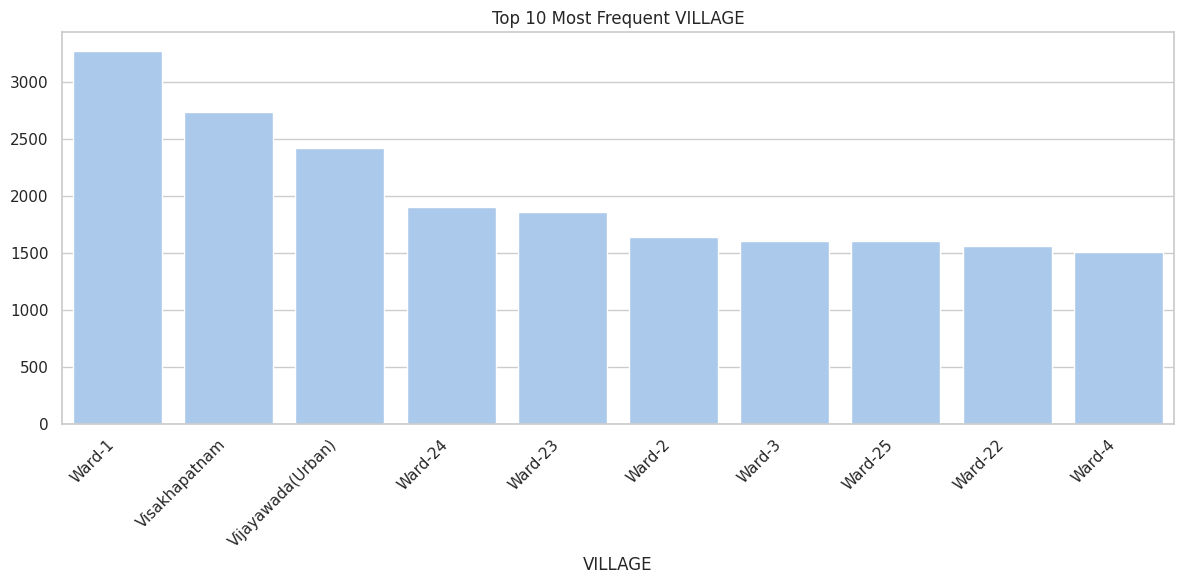


Top 10 MANDAL_NAME Analysis:
                  Count  Avg_Claim  Mortality_Rate_%
MANDAL_NAME                                         
Visakhapatnam      9264   26127.37               0.0
Nellore            7246   27679.66               0.0
Vijayawada         6150   30036.42               0.0
Kurnool            5013   27270.22               0.0
Guntur(C)          4877   30804.25               0.0
Rajahmundry(M)     3252   27516.05               0.0
Vizianagaram       3121   27170.81               0.0
Tirupati(Mc)       2847   23319.15               0.0
Visakhapatnam(U)   2796   27338.15               0.0
Ongole             2533   26568.10               0.0


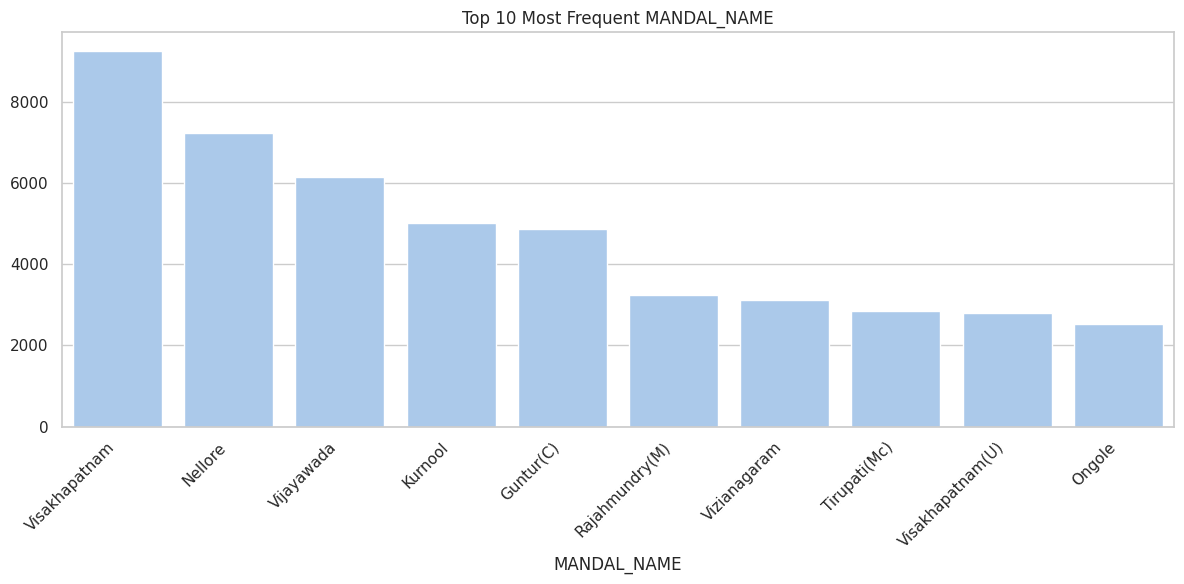


Top 10 HOSP_NAME Analysis:
                                                    Count  Avg_Claim  \
HOSP_NAME                                                              
Sri Venkateswara Institute Of Medical Sciences      21854   24207.90   
King George Hospital                                13468   24270.72   
BASAVATARAKAM INDO AMERICAN CANCER HOSPITAL and...  12590   14734.78   
Government General Hospital, Guntur                 12466   24406.34   
Government General Hospital,Kakinada                10264   18752.03   
Govt General Hospital Kurnool                       10250   23684.50   
Narayana Medical College Hospital                    9342   30450.91   
Nri Academyof Sciences                               9062   27313.83   
Krishna Institute of Medical Sciences Bollineni...   8842   35706.75   
Ms Mahatma Gandhi Cancer Hospital and Research ...   7696   19269.24   

                                                    Mortality_Rate_%  
HOSP_NAME                           

<ipython-input-26-d22591d3aec8>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


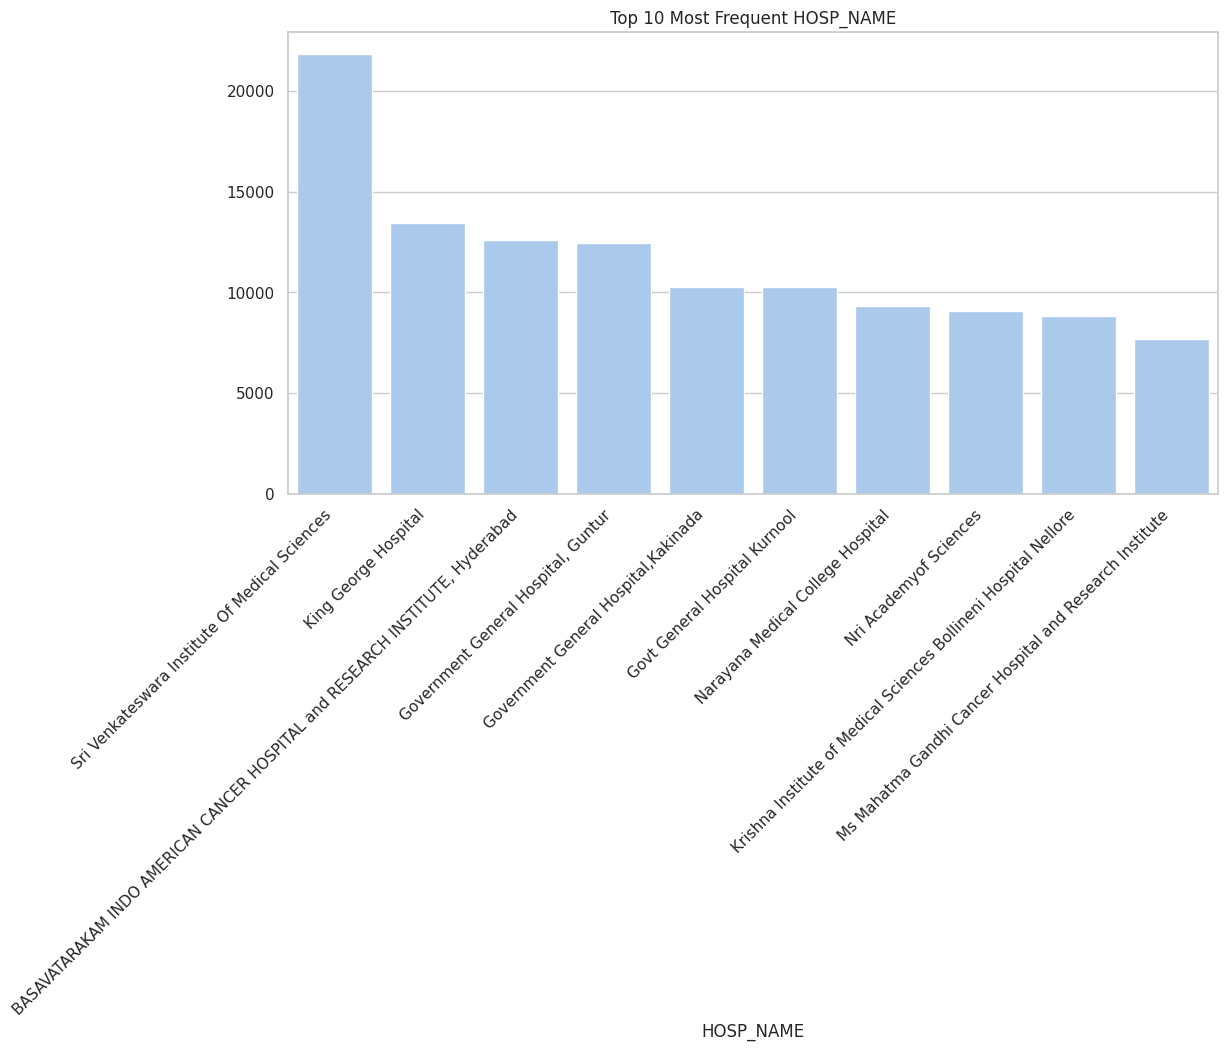

In [26]:
#Analyzing data across different locations
location_cols = ['VILLAGE', 'MANDAL_NAME', 'HOSP_NAME']

for col in location_cols:
  top_values = df[col].value_counts().head(10)

  claim_avg = df.groupby(col)['CLAIM_AMOUNT'].mean().round(2)
  mortality_rate = df.groupby(col)['Mortality'].apply(lambda x: (x == '1').mean() * 100).round(2)

  metrics_df = pd.DataFrame({'Count': df[col].value_counts(),'Avg_Claim': claim_avg,'Mortality_Rate_%': mortality_rate}).sort_values('Count', ascending=False).head(10)

  print(f"\nTop 10 {col} Analysis:")
  print(metrics_df)

  plt.figure(figsize=(12, 6))
  sns.barplot(x=top_values.index, y=top_values.values)
  plt.xticks(rotation=45, ha='right')
  plt.title(f'Top 10 Most Frequent {col}')
  plt.tight_layout()
  plt.show()


Registration Source Analysis:
                   Count  Avg_Claim  Mortality_Rate_%
SRC_REGISTRATION                                     
CMO                14706   29172.56               0.0
D                 437948   27748.31               0.0
MC                  7934   28773.34               0.0
P                  19100   23812.27               0.0


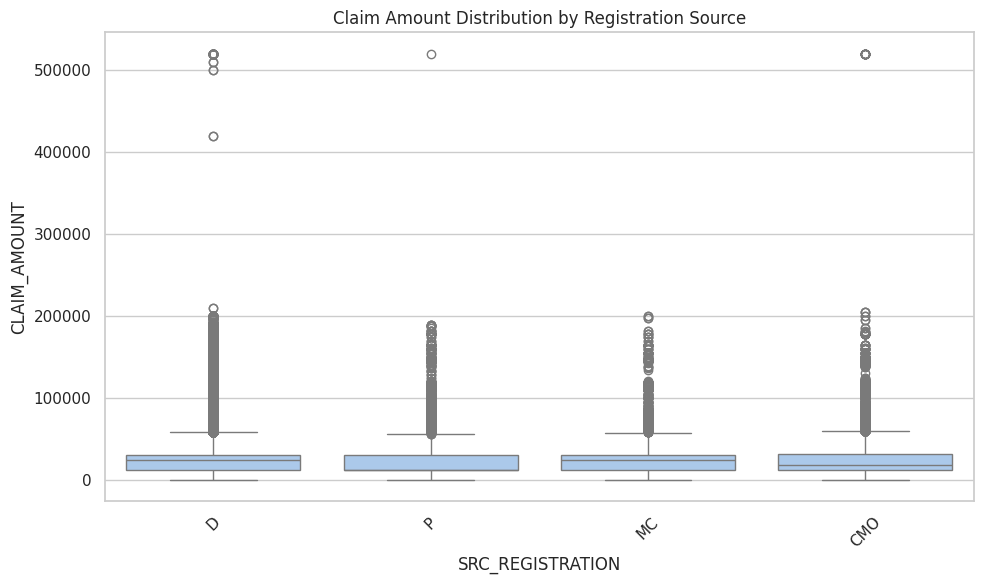

In [27]:
# Distribution of registration sources
reg_dist = df['SRC_REGISTRATION'].value_counts()

reg_metrics = pd.DataFrame({'Count': reg_dist,'Avg_Claim': df.groupby('SRC_REGISTRATION')['CLAIM_AMOUNT'].mean().round(2),'Mortality_Rate_%': df.groupby('SRC_REGISTRATION')['Mortality'].apply(lambda x: (x == '1').mean() * 100).round(2)})

print("\nRegistration Source Analysis:")
print(reg_metrics)

plt.figure(figsize=(10, 6))
sns.boxplot(x='SRC_REGISTRATION', y='CLAIM_AMOUNT', data=df)
plt.xticks(rotation=45)
plt.title('Claim Amount Distribution by Registration Source')
plt.tight_layout()
plt.show()


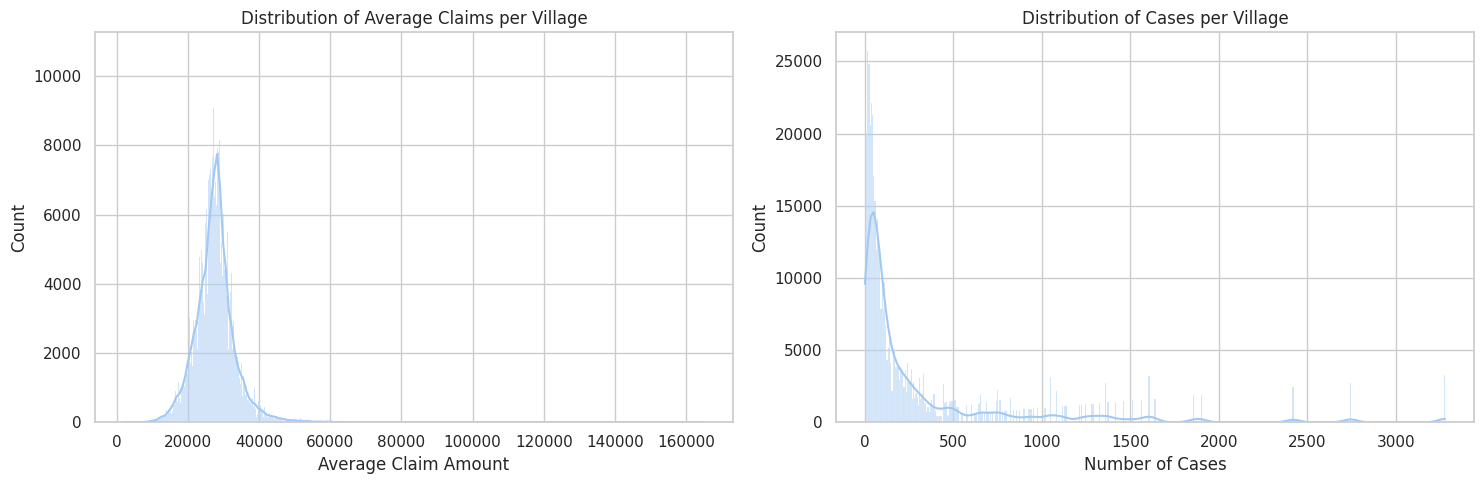

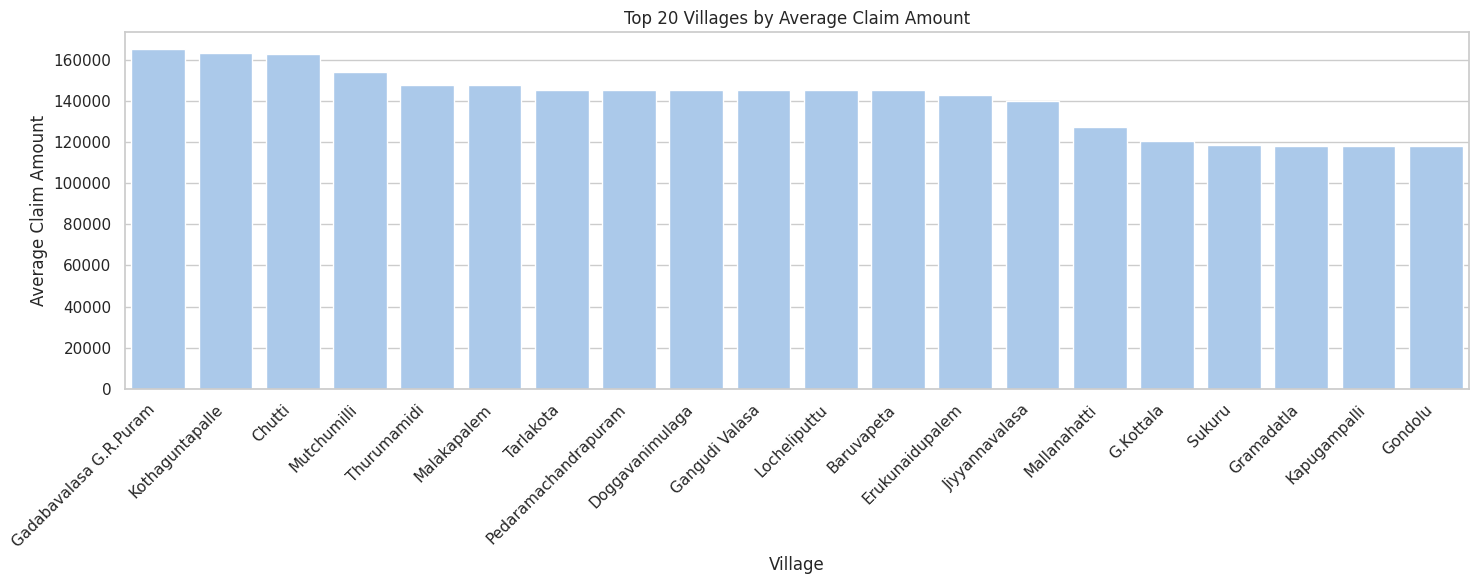

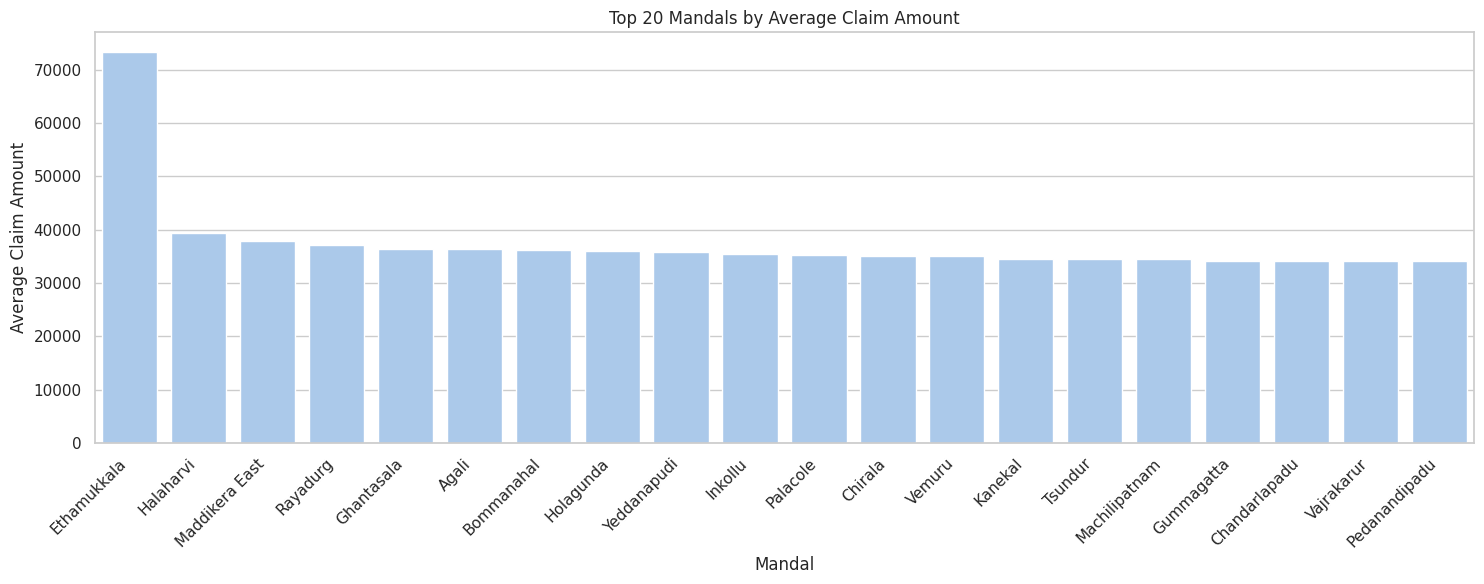

<Figure size 1500x600 with 0 Axes>

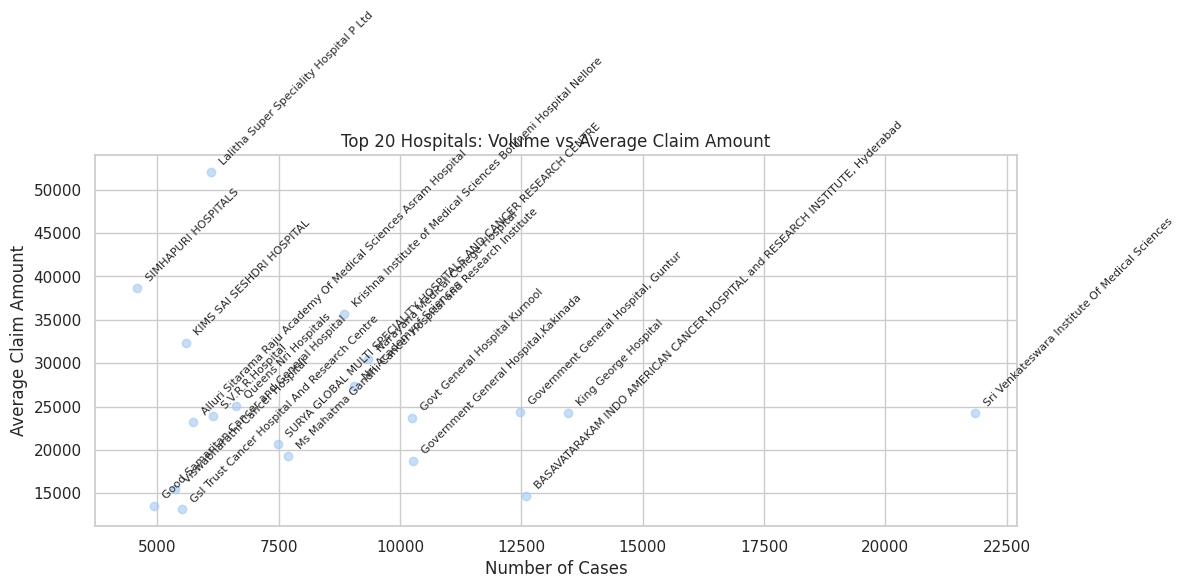

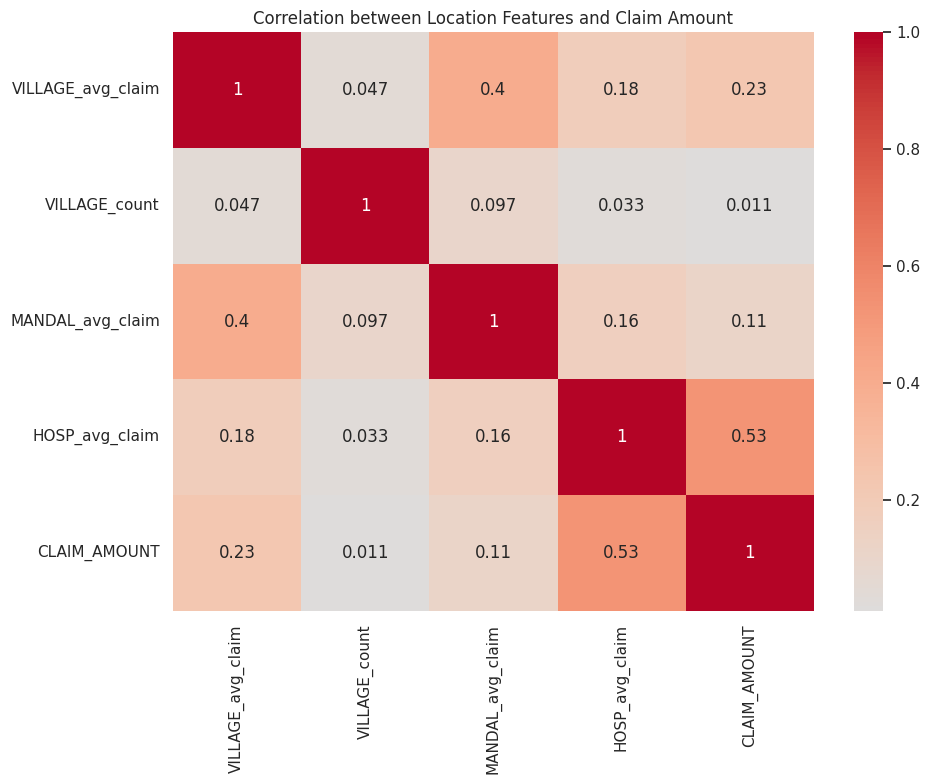

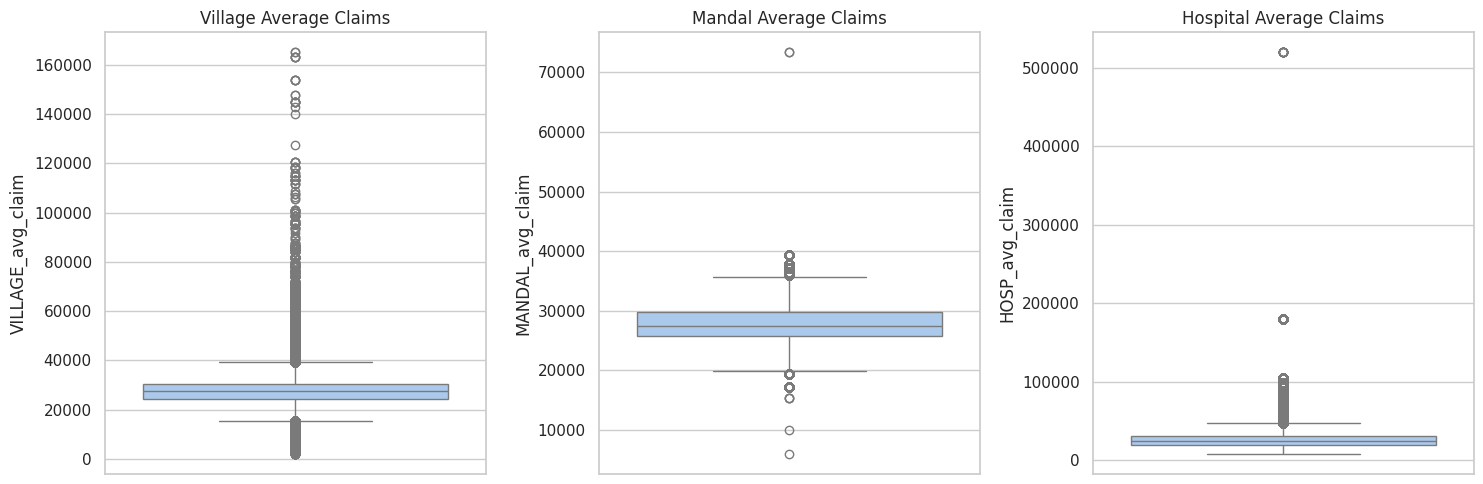

In [28]:
# Calculate location-based statistics
village_stats = df.groupby('VILLAGE')['CLAIM_AMOUNT'].agg(['mean', 'count']).reset_index()
mandal_stats = df.groupby('MANDAL_NAME')['CLAIM_AMOUNT'].agg(['mean', 'count']).reset_index()
hospital_stats = df.groupby('HOSP_NAME')['CLAIM_AMOUNT'].agg(['mean', 'count']).reset_index()

# Create mappings for high-cardinality categories
df['VILLAGE_avg_claim'] = df['VILLAGE'].map(dict(zip(village_stats['VILLAGE'], village_stats['mean'])))
df['VILLAGE_count'] = df['VILLAGE'].map(dict(zip(village_stats['VILLAGE'], village_stats['count'])))
df['MANDAL_avg_claim'] = df['MANDAL_NAME'].map(dict(zip(mandal_stats['MANDAL_NAME'], mandal_stats['mean'])))
df['HOSP_avg_claim'] = df['HOSP_NAME'].map(dict(zip(hospital_stats['HOSP_NAME'], hospital_stats['mean'])))


#Visualization

# 1. Village Statistics
plt.figure(figsize=(15, 5))

# Average claim amount distribution
plt.subplot(121)
sns.histplot(df['VILLAGE_avg_claim'], kde=True)
plt.title('Distribution of Average Claims per Village')
plt.xlabel('Average Claim Amount')
plt.ylabel('Count')

# Village frequency distribution
plt.subplot(122)
sns.histplot(df['VILLAGE_count'], kde=True)
plt.title('Distribution of Cases per Village')
plt.xlabel('Number of Cases')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Top 20 Villages by Average Claim
plt.figure(figsize=(15, 6))
top_villages = df.groupby('VILLAGE')['VILLAGE_avg_claim'].mean().sort_values(ascending=False).head(20)

sns.barplot(x=top_villages.index, y=top_villages.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Villages by Average Claim Amount')
plt.xlabel('Village')
plt.ylabel('Average Claim Amount')
plt.tight_layout()
plt.show()

# 3. Mandal Statistics
plt.figure(figsize=(15, 6))
top_mandals = df.groupby('MANDAL_NAME')['MANDAL_avg_claim'].mean().sort_values(ascending=False).head(20)

sns.barplot(x=top_mandals.index, y=top_mandals.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Mandals by Average Claim Amount')
plt.xlabel('Mandal')
plt.ylabel('Average Claim Amount')
plt.tight_layout()
plt.show()

# 4. Hospital Statistics
plt.figure(figsize=(15, 6))

# Get top 20 hospitals by volume
top_hospitals = df.groupby('HOSP_NAME').size().sort_values(ascending=False).head(20)
hospital_claims = df.groupby('HOSP_NAME')['HOSP_avg_claim'].mean()[top_hospitals.index]

# Create a scatter plot of volume vs average claim for top hospitals
plt.figure(figsize=(12, 6))
plt.scatter(top_hospitals.values, hospital_claims.values, alpha=0.6)

# Add hospital names as annotations
for i, txt in enumerate(top_hospitals.index):
  plt.annotate(txt, (top_hospitals.values[i], hospital_claims.values[i]),xytext=(5, 5), textcoords='offset points',fontsize=8, rotation=45)

plt.title('Top 20 Hospitals: Volume vs Average Claim Amount')
plt.xlabel('Number of Cases')
plt.ylabel('Average Claim Amount')
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
location_cols = ['VILLAGE_avg_claim', 'VILLAGE_count','MANDAL_avg_claim', 'HOSP_avg_claim']

correlation_matrix = df[location_cols + ['CLAIM_AMOUNT']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Location Features and Claim Amount')
plt.tight_layout()
plt.show()

# 6. Box plots for claim distributions
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.boxplot(y=df['VILLAGE_avg_claim'])
plt.title('Village Average Claims')

plt.subplot(132)
sns.boxplot(y=df['MANDAL_avg_claim'])
plt.title('Mandal Average Claims')

plt.subplot(133)
sns.boxplot(y=df['HOSP_avg_claim'])
plt.title('Hospital Average Claims')

plt.tight_layout()
plt.show()


In [29]:
df.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'Mortality Y / N', 'SRC_REGISTRATION', 'Mortality',
       'VILLAGE_avg_claim', 'VILLAGE_count', 'MANDAL_avg_claim',
       'HOSP_avg_claim'],
      dtype='object')

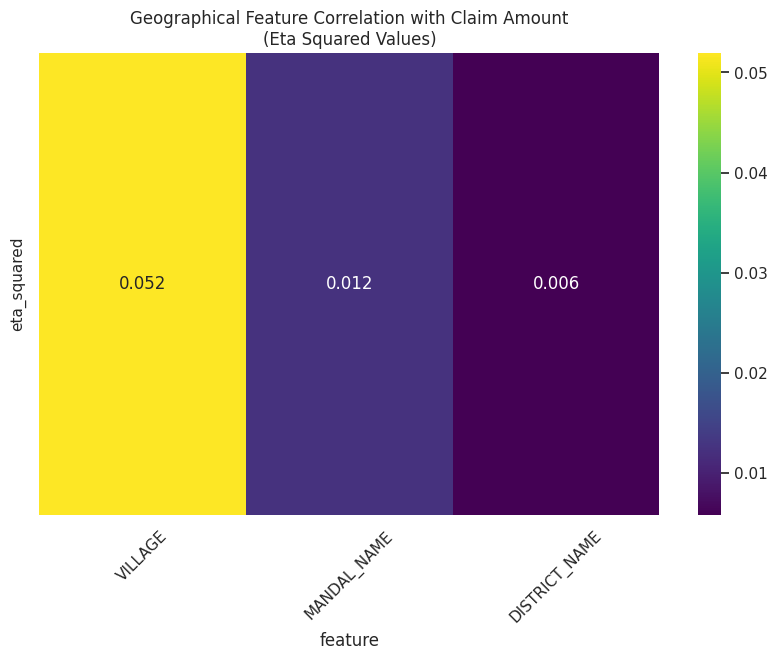


Statistical Significance:
VILLAGE: p-value = 0.0000e+00
MANDAL_NAME: p-value = 0.0000e+00
DISTRICT_NAME: p-value = 0.0000e+00


In [30]:
# Calculate correlation using ANOVA (for categorical vs continuous)
from scipy.stats import f_oneway
def calculate_geospatial_correlation(df, feature, target='CLAIM_AMOUNT'):
    grouped = [group[target].values for name, group in df.groupby(feature)]
    f_stat, p_value = f_oneway(*grouped)

    # Calculate Eta Squared effect size
    ss_between = sum([(group.mean() - df[target].mean())**2 * len(group) for group in grouped])
    ss_total = sum((df[target] - df[target].mean())**2)
    eta_squared = ss_between / ss_total

    return {'feature': feature, 'eta_squared': eta_squared, 'f_stat': f_stat, 'p_value': p_value}

# Calculate for all geographical features
geo_features = ['VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME']
results = [calculate_geospatial_correlation(df, feat) for feat in geo_features]

# Create correlation matrix
geo_corr = pd.DataFrame(results).set_index('feature')[['eta_squared']]

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(geo_corr.T, annot=True, cmap='viridis', fmt=".3f")
plt.title('Geographical Feature Correlation with Claim Amount\n(Eta Squared Values)')
plt.xticks(rotation=45)
plt.show()

# Print statistical significance
print("\nStatistical Significance:")
for res in results:
    print(f"{res['feature']}: p-value = {res['p_value']:.4e}")

<ipython-input-31-8347dd0c75a4>:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(result_df[['eta_squared', 'correlation']].fillna(0),


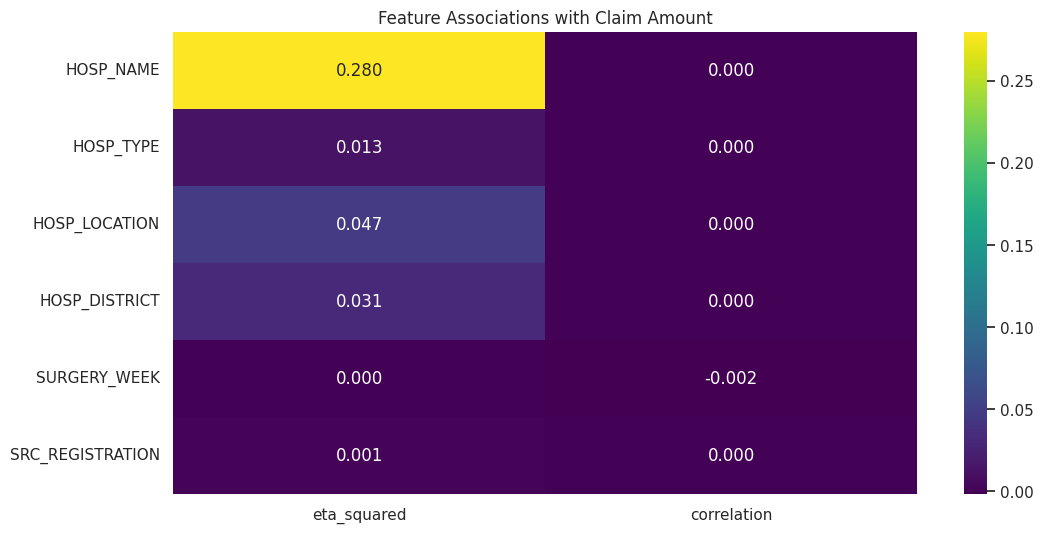

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

df['SURGERY_DATE'] = pd.to_datetime(df['SURGERY_DATE'], format='%d/%m/%Y %H:%M:%S')

# Prepare temporal feature from surgery date
df['SURGERY_WEEK'] = df['SURGERY_DATE'].dt.isocalendar().week
df['SURGERY_QUARTER'] = df['SURGERY_DATE'].dt.quarter

def calculate_association(feature, target='CLAIM_AMOUNT'):
    if df[feature].dtype == 'object':
        # Categorical: ANOVA + Eta Squared
        grouped = [group[target].values for name, group in df.groupby(feature)]
        f_stat, p_value = stats.f_oneway(*grouped)
        ss_between = sum([(group.mean() - df[target].mean())**2 * len(group) for group in grouped])
        ss_total = sum((df[target] - df[target].mean())**2)
        eta_sq = ss_between / ss_total
        return {'type': 'categorical', 'eta_squared': eta_sq, 'p_value': p_value}

    else:
        # Continuous/Numeric: Pearson/Spearman
        corr = df[[feature, target]].corr(method='spearman').iloc[0,1]
        return {'type': 'continuous', 'correlation': corr}

# Analyze all features
features = ['HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION',
           'HOSP_DISTRICT', 'SURGERY_WEEK', 'SRC_REGISTRATION']

results = {}
for feat in features:
    results[feat] = calculate_association(feat)

# Create visualization
result_df = pd.DataFrame(results).T
plt.figure(figsize=(12,6))
sns.heatmap(result_df[['eta_squared', 'correlation']].fillna(0),
           annot=True, cmap='viridis', fmt=".3f")
plt.title('Feature Associations with Claim Amount')
plt.show()


['D' 'P' 'MC' 'CMO']


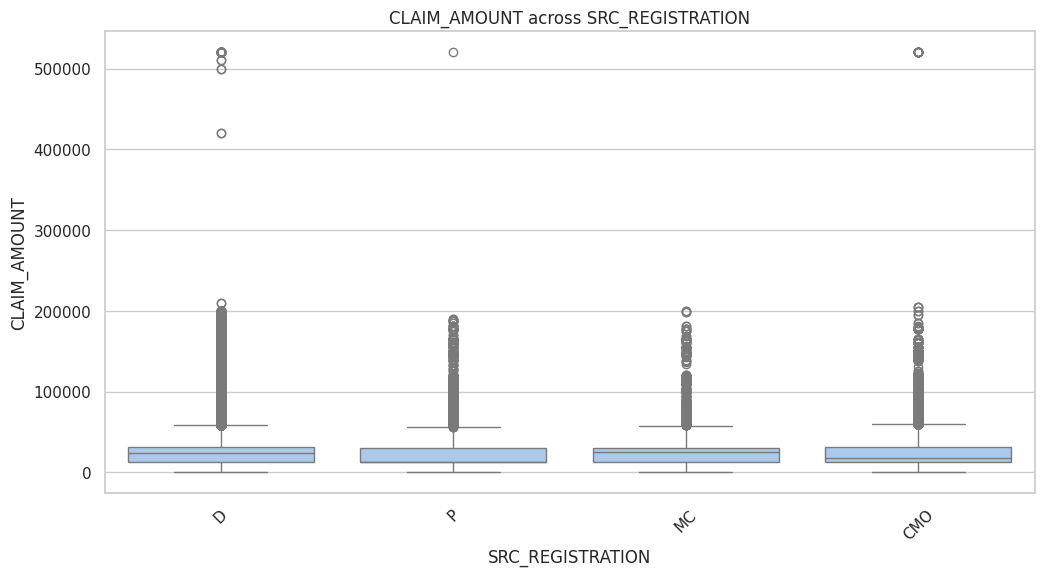

In [32]:
print(df['SRC_REGISTRATION'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(x='SRC_REGISTRATION', y='CLAIM_AMOUNT', data=df)
plt.title('CLAIM_AMOUNT across SRC_REGISTRATION')
plt.xticks(rotation=45)
plt.show()


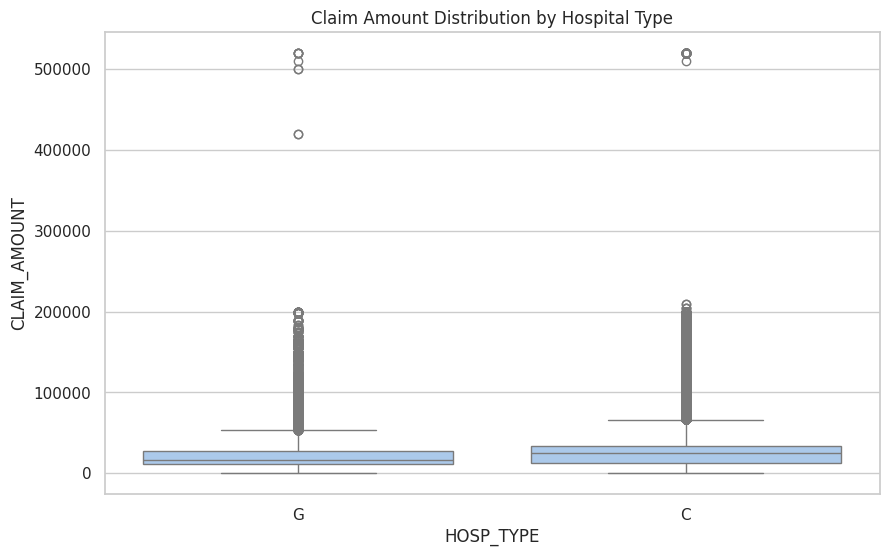

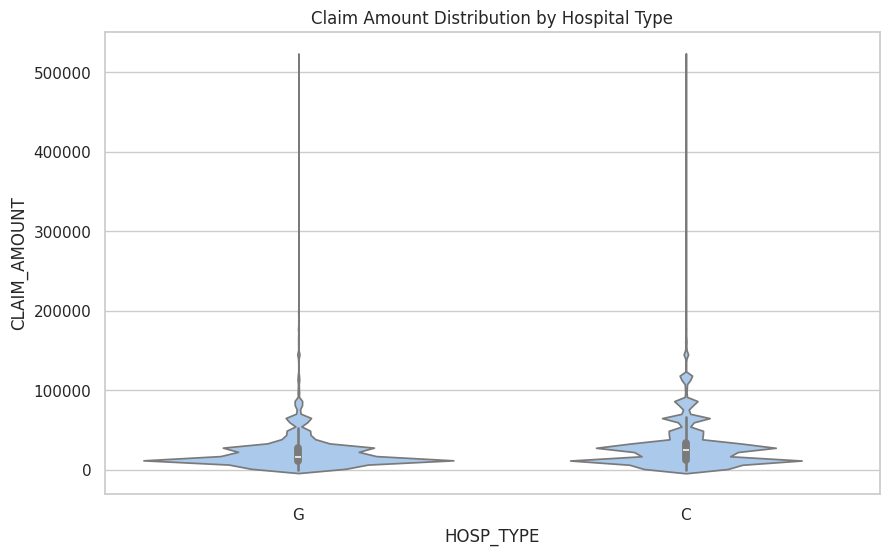

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare CLAIM_AMOUNT across HOSP_TYPE
plt.figure(figsize=(10, 6))
sns.boxplot(x='HOSP_TYPE', y='CLAIM_AMOUNT', data=df)
plt.title('Claim Amount Distribution by Hospital Type')
plt.show()

# Violin plot for a detailed view
plt.figure(figsize=(10, 6))
sns.violinplot(x='HOSP_TYPE', y='CLAIM_AMOUNT', data=df)
plt.title('Claim Amount Distribution by Hospital Type')
plt.show()


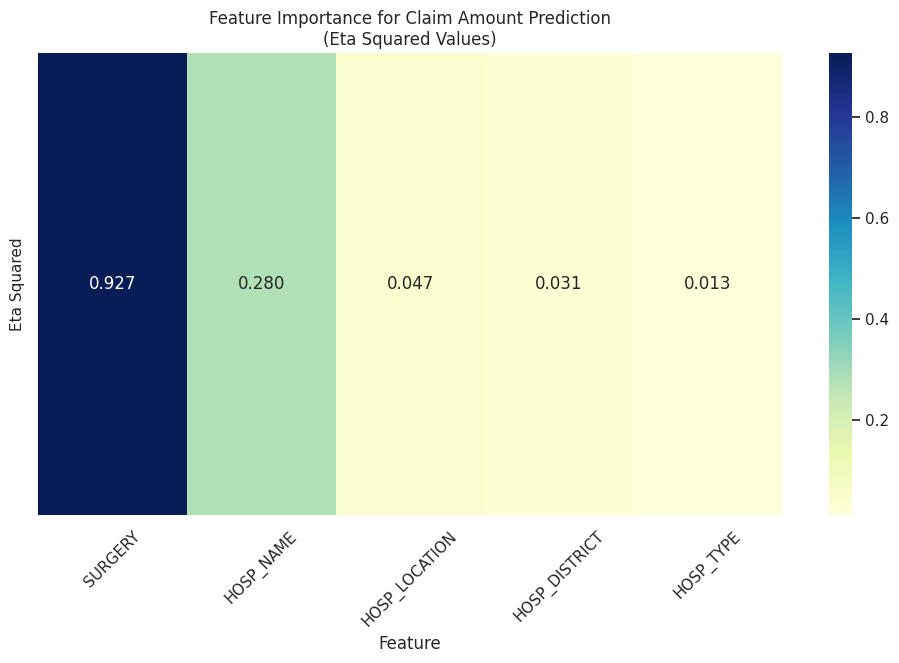


Statistical Significance:
SURGERY: p-value = 0.0000e+00 ***
HOSP_NAME: p-value = 0.0000e+00 ***
HOSP_TYPE: p-value = 0.0000e+00 ***
HOSP_LOCATION: p-value = 0.0000e+00 ***
HOSP_DISTRICT: p-value = 0.0000e+00 ***


In [34]:
# 1. Eta Squared Calculation for Categorical Features
def calculate_eta_squared(df, categorical_feature, target='CLAIM_AMOUNT'):
    categories = df[categorical_feature].unique()
    groups = [df[df[categorical_feature] == cat][target] for cat in categories]

    # ANOVA calculation
    f_value, p_value = f_oneway(*groups)

    # Eta squared calculation
    ss_between = sum([(group.mean() - df[target].mean())**2 * len(group) for group in groups])
    ss_total = sum((df[target] - df[target].mean())**2)
    eta_squared = ss_between / ss_total

    return {
        'Feature': categorical_feature,
        'Eta Squared': eta_squared,
        'F-value': f_value,
        'p-value': p_value
    }

# Features to analyze
features = ['SURGERY', 'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT']

# Calculate for all features
results = []
for feature in features:
    results.append(calculate_eta_squared(df, feature))

results_df = pd.DataFrame(results).sort_values('Eta Squared', ascending=False)

# 2. Visualization
plt.figure(figsize=(12, 6))
heatmap_data = results_df[['Feature', 'Eta Squared']].set_index('Feature')
sns.heatmap(heatmap_data.T, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Feature Importance for Claim Amount Prediction\n(Eta Squared Values)')
plt.xticks(rotation=45)
plt.show()

# 3. Statistical Significance Check
print("\nStatistical Significance:")
for res in results:
    significance = "***" if res['p-value'] < 0.001 else "**" if res['p-value'] < 0.01 else "*" if res['p-value'] < 0.05 else "ns"
    print(f"{res['Feature']}: p-value = {res['p-value']:.4e} {significance}")

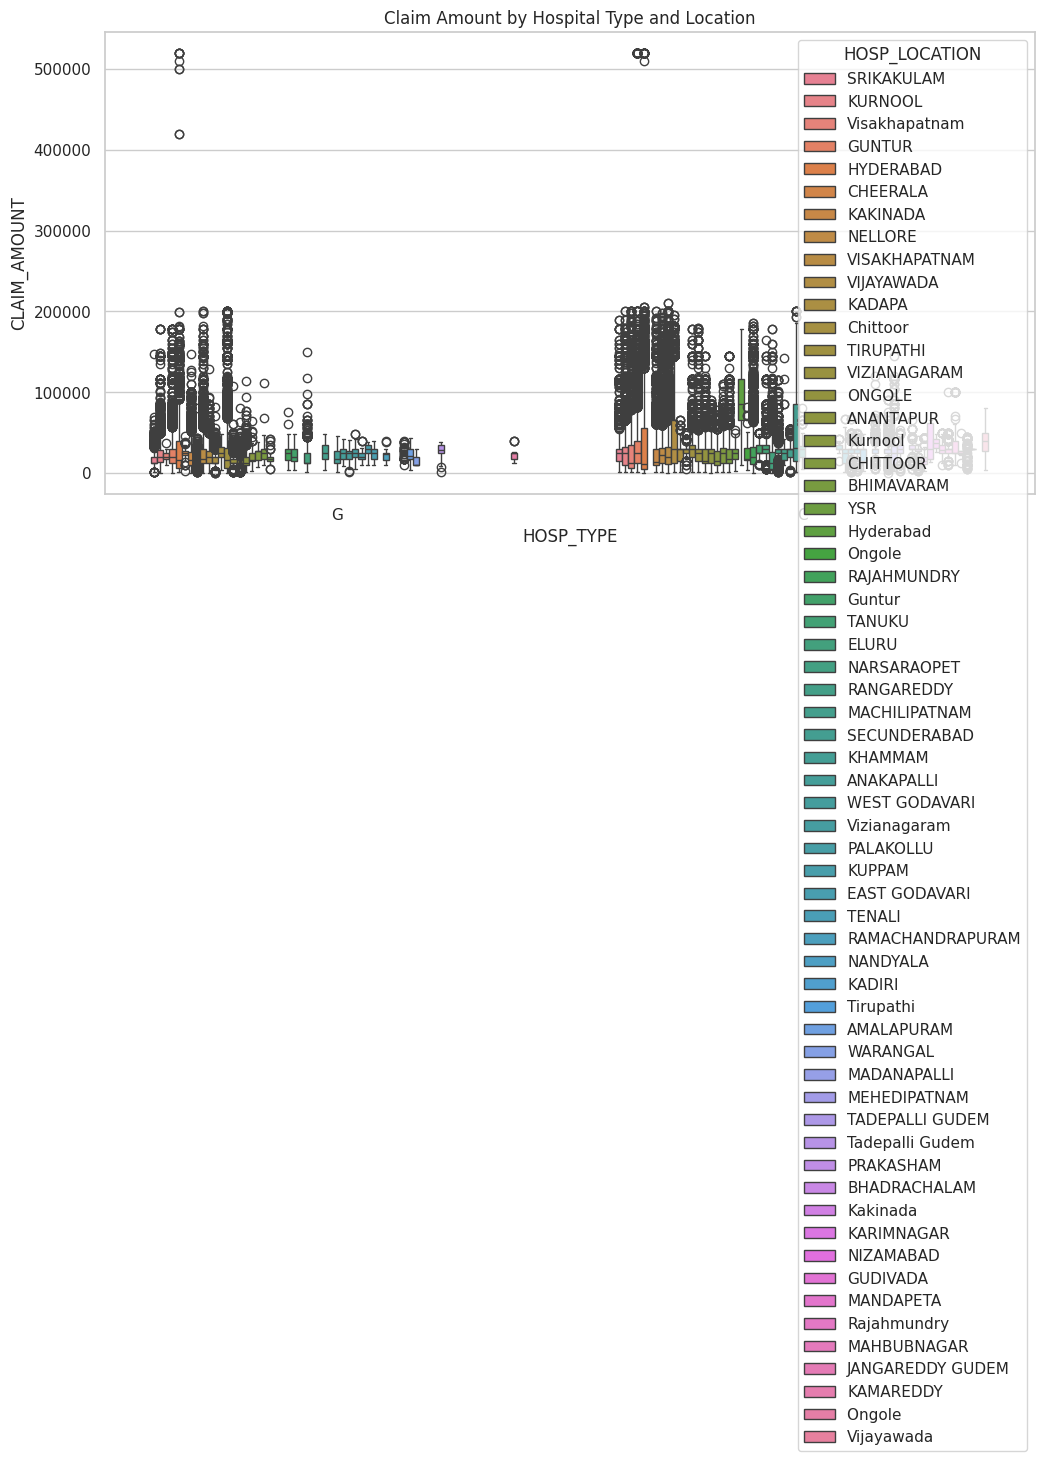

In [35]:
# Interaction: HOSP_TYPE vs CLAIM_AMOUNT grouped by HOSP_LOCATION
plt.figure(figsize=(12, 6))
sns.boxplot(x='HOSP_TYPE', y='CLAIM_AMOUNT', hue='HOSP_LOCATION', data=df)
plt.title('Claim Amount by Hospital Type and Location')
plt.show()


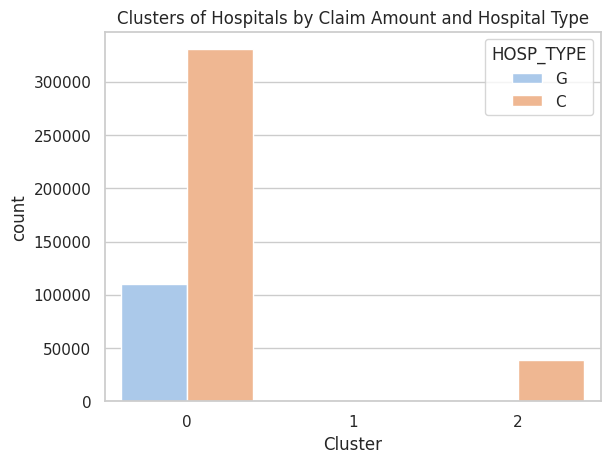

In [36]:
from sklearn.cluster import KMeans

# Prepare data for clustering
cluster_data = df.groupby('HOSP_NAME')['CLAIM_AMOUNT'].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data[['CLAIM_AMOUNT']])

# Merge cluster labels back to original dataset
df = df.merge(cluster_data[['HOSP_NAME', 'Cluster']], on='HOSP_NAME', how='left')

# Visualize clusters vs HOSP_TYPE
sns.countplot(x='Cluster', hue='HOSP_TYPE', data=df)
plt.title('Clusters of Hospitals by Claim Amount and Hospital Type')
plt.show()


HOSP_LOCATION_VIJAYAWADA      3.109156e-01
HOSP_LOCATION_Hyderabad       1.733482e-01
HOSP_TYPE_G                   1.732853e-01
HOSP_LOCATION_SECUNDERABAD    6.181413e-02
HOSP_LOCATION_HYDERABAD       5.468043e-02
                                  ...     
HOSP_LOCATION_NIZAMABAD       1.484493e-05
HOSP_LOCATION_WARANGAL        1.239576e-05
HOSP_LOCATION_MAHBUBNAGAR     8.495249e-06
HOSP_LOCATION_Ongole          4.958047e-06
HOSP_LOCATION_KAMAREDDY       2.160325e-08
Length: 61, dtype: float64


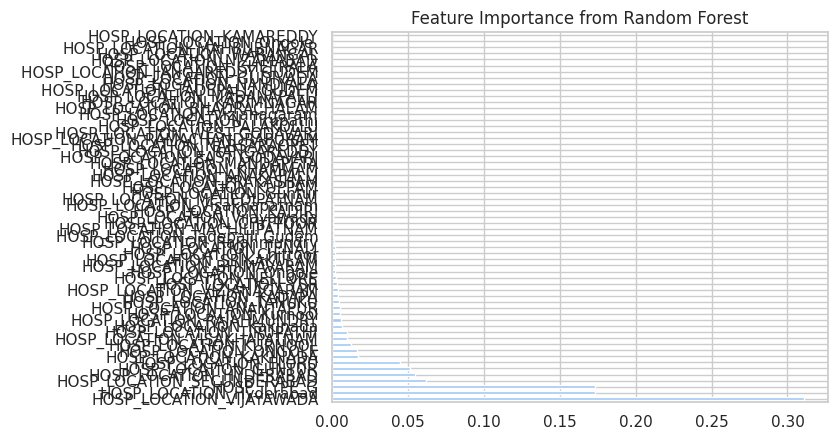

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = pd.get_dummies(df[['HOSP_TYPE', 'HOSP_LOCATION']], drop_first=True)  # Encode categorical features
y = df['CLAIM_AMOUNT']

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Visualize feature importance
feature_importances.plot(kind='barh')
plt.title('Feature Importance from Random Forest')
plt.show()
